In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rpy2
%load_ext rpy2.ipython

In [ ]:
rds_path = "/content/drive/MyDrive/Jobs/UCSF/dataset-test.RDS"

In [ ]:
%%R -i rds_path

sn_data <- readRDS(rds_path)
print(class(sn_data))

[1] "Seurat"
attr(,"package")
[1] "SeuratObject"


In [ ]:
import rpy2.robjects as ro

rds_path = "/content/drive/MyDrive/Jobs/UCSF/dataset-test.RDS"

ro.r(f"""
suppressPackageStartupMessages(library(Seurat))

sn <- readRDS('{rds_path}')

cat("==== Assays ====\n")
print(Assays(sn))

cat("\n==== Reductions ====\n")
print(Reductions(sn))

cat("\n==== Metadata (head) ====\n")
print(head(sn@meta.data))

cat("\n==== Dimensions of counts for each assay ====\n")
for (a in Assays(sn)) {{
  DefaultAssay(sn) <- a
  dims <- dim(GetAssayData(sn, slot='counts'))
  cat(a, ": ", dims[1], " genes x ", dims[2], " cells\n", sep="")
}}
""")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    ==== Assays ====
[1] "RNA"

==== Reductions ====
NULL

==== Metadata (head) ====
                                orig.ident nCount_RNA nFeature_RNA
S59-_AAACGAAAGGCATTTC-301MCX SeuratProject      38650         8214
S59-_AAAGAACAGTTACGTC-301MCX SeuratProject      30883         7154
S59-_AAAGAACGTAATGATG-301MCX SeuratProject      12202         5034
S59-_AAAGGTACAACAAGTA-301MCX SeuratProject      46757         9211
S59-_AAAGTGAAGCAAGTCG-301MCX SeuratProject      30239         7822
S59-_AAATGGACAAAGGAGA-301MCX SeuratProject      21748         6864
                                             Barcode Sample_ID
S59-_AAACGAAAGGCATTTC-301MCX AAACGAAAGGCATTTC-301MCX  Sample_1
S59-_AAAGAACAGTTACGTC-301MCX AAAGAACAGTTACGTC-301MCX  Sample_1
S59-_AAAGAACGTAATGATG-301MCX AAAGAACGTAATGATG-301MCX  Sample_1
S59-


ℹ Please use the `layer` argument instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was
generated. 



In [ ]:
import rpy2.robjects as ro

# Path to the input RDS file and output files
rds_path = "/content/drive/MyDrive/Jobs/UCSF/dataset-test.RDS"
output_dir = "/content/drive/MyDrive/Jobs/UCSF"

ro.r(f'''
suppressPackageStartupMessages({{
  library(Seurat)
  library(Matrix)
}})

sn <- readRDS("{rds_path}")
DefaultAssay(sn) <- "RNA"

# Extract count matrix (Seurat v4)
counts_mat <- GetAssayData(sn, assay = "RNA", slot = "counts")
cat("Detected Seurat v4 (using slot='counts')\\n")

# Ensure the matrix is in sparse dgCMatrix format
if (!inherits(counts_mat, "dgCMatrix")) {{
  counts_mat <- as(counts_mat, "dgCMatrix")
}}

# Export in Matrix Market + metadata format
Matrix::writeMM(counts_mat, file.path("{output_dir}", "counts.mtx"))
write.table(rownames(counts_mat), file.path("{output_dir}", "genes.txt"),
            quote = FALSE, row.names = FALSE, col.names = FALSE)
write.table(colnames(counts_mat), file.path("{output_dir}", "barcodes.txt"),
            quote = FALSE, row.names = FALSE, col.names = FALSE)
write.csv(sn@meta.data, file.path("{output_dir}", "obs.csv"), row.names = TRUE)

cat("\\nExport finished:\\n")
cat("  - counts.mtx:", dim(counts_mat)[1], "genes ×", dim(counts_mat)[2], "cells\\n")
cat("  - genes.txt\\n")
cat("  - barcodes.txt\\n")
cat("  - obs.csv\\n")
''')

print("R to Matrix Market conversion completed successfully.")


Detected Seurat v4 (using slot='counts')

Export finished:
  - counts.mtx: 36503 genes × 35309 cells
  - genes.txt
  - barcodes.txt
  - obs.csv
R to Matrix Market conversion completed successfully.


In [ ]:
!pip install scanpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.3/233.3 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 118.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.1/90.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install mygene

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.3 MB/s eta 0:00:00


In [ ]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 37.3 MB/s eta 0:00:00


In [ ]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 62.9 MB/s eta 0:00:00


In [ ]:
!pip install scikit-misc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.6/183.6 kB 6.8 MB/s eta 0:00:00


In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import issparse
import re
import scanpy as sc
from scipy.stats import mannwhitneyu
import mygene
import seaborn as sns
from scipy.stats import zscore
from adjustText import adjust_text

In [ ]:
output_dir = "/content/drive/MyDrive/Jobs/UCSF"

adata = sc.read_mtx(f"{output_dir}/counts.mtx").T
genes = [x.strip() for x in open(f"{output_dir}/genes.txt")]
barcodes = [x.strip() for x in open(f"{output_dir}/barcodes.txt")]

adata.var_names = genes
adata.obs_names = barcodes

meta = pd.read_csv(f"{output_dir}/obs.csv", index_col=0)
adata.obs = meta

print(adata)

AnnData object with n_obs × n_vars = 35309 × 36503
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Barcode', 'Sample_ID'


In [ ]:
print("n_vars:", adata.n_vars)
print("First 20 var_names:", list(adata.var_names[:20]))

# Check for Ensembl ID (ENSG/ENSMUSG) or version suffix (.#)
ens_like = adata.var_names.str.match(r'^ENS(G|MUSG)\d+(\.\d+)?$', case=False).sum()
has_version = adata.var_names.str.contains(r'\.\d+$').sum()
print(f"Looks like Ensembl IDs: {ens_like} / {adata.n_vars}")
print(f"With version suffix (.N): {has_version} / {adata.n_vars}")

# Additional checks
is_symbol = adata.var_names.str.match(r'^[A-Z][A-Z0-9-]+$').sum()
print(f"Looks like gene symbols: {is_symbol} / {adata.n_vars}")

n_vars: 36503
First 20 var_names: ['ENSG00000243485', 'ENSG00000237613', 'ENSG00000186092', 'ENSG00000238009', 'ENSG00000239945', 'ENSG00000239906', 'ENSG00000241860', 'ENSG00000241599', 'ENSG00000286448', 'ENSG00000236601', 'ENSG00000284733', 'ENSG00000235146', 'ENSG00000284662', 'ENSG00000229905', 'ENSG00000237491', 'ENSG00000177757', 'ENSG00000228794', 'ENSG00000225880', 'ENSG00000230368', 'ENSG00000272438']
Looks like Ensembl IDs: 36503 / 36503
With version suffix (.N): 0 / 36503
Looks like gene symbols: 36503 / 36503


In [ ]:
# Preserve raw counts
if "counts" not in adata.layers:
    adata.layers["counts"] = adata.X.copy()

# Check species and convert Ensembl IDs to gene symbols
is_human = np.all(adata.var_names.str.startswith("ENSG"))
is_mouse = np.all(adata.var_names.str.startswith("ENSMUSG"))
print(f"Species check - Human: {is_human}, Mouse: {is_mouse}")

# Convert Ensembl to gene symbols using mygene
mg = mygene.MyGeneInfo()
ens = adata.var_names.tolist()

result = mg.querymany(
    ens,
    scopes="ensembl.gene",
    fields="symbol,genomic_pos.chrom",
    species="human",
    returnall=True
)

# Convert to DataFrame and handle duplicates
df = pd.DataFrame(result["out"])
if "query" in df.columns:
    df = df.drop_duplicates(subset="query", keep="first")
    df = df.set_index("query")

    df = df.reindex(ens)

    symbol_series = df["symbol"]
    adata.var["symbol"] = symbol_series.fillna(pd.Series(adata.var_names, index=adata.var_names)).astype(str)

    if "genomic_pos.chrom" in df.columns:
        adata.var["chrom"] = df["genomic_pos.chrom"].fillna("unknown").astype(str)
    elif "genomic_pos" in df.columns:
        adata.var["chrom"] = df["genomic_pos"].apply(
            lambda x: x.get("chr", "unknown") if isinstance(x, dict) else "unknown"
        )
    else:
        adata.var["chrom"] = "unknown"
else:
    print("Warning: Could not parse mygene results properly")
    adata.var["symbol"] = adata.var_names.astype(str)
    adata.var["chrom"] = "unknown"

print(f"Genes with symbols: {(adata.var['symbol'] != adata.var_names).sum()}/{adata.n_vars}")
print(f"Duplicate queries: {len(result['dup'])}, Missing queries: {len(result['missing'])}")

# Annotate mitochondrial and ribosomal genes based on symbols/chromosome
symu = adata.var["symbol"].str.upper()
adata.var["mt"] = (
    symu.str.startswith("MT-") |
    (adata.var["chrom"].str.upper() == "MT") |
    adata.var_names.str.upper().str.startswith("MT-")
adata.var["ribo"] = symu.str.startswith(("RPL", "RPS"))

print(f"MT genes found: {int(adata.var['mt'].sum())}")
print(f"Ribosomal genes found: {int(adata.var['ribo'].sum())}")

# Calculate QC metrics BEFORE filtering
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt", "ribo"], percent_top=None, log1p=False, inplace=True
)

# Check QC distribution before filtering
print("\n=== QC Metrics Before Filtering ===")
print(adata.obs[["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"]].describe())

# Filter cells based on QC metrics
cells_before = adata.n_obs
sc.pp.filter_cells(adata, min_genes=300)
adata = adata[adata.obs["pct_counts_mt"] < 15, :].copy()
print(f"\nQC filtering: kept {adata.n_obs}/{cells_before} cells ({adata.n_obs/cells_before:.1%})")

# Filter genes
genes_before = adata.n_vars
sc.pp.filter_genes(adata, min_cells=3)
print(f"Gene filtering: kept {adata.n_vars}/{genes_before} genes ({adata.n_vars/genes_before:.1%})")

# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.layers["log1p"] = adata.X.copy()

# Store full-gene log1p data in raw for downstream analysis
adata.raw = adata.copy()

print("\n QC complete!")
print(f"Final dataset: {adata.n_obs} cells × {adata.n_vars} genes")

INFO:biothings.client:querying 1-1000 ...


Species check - Human: True, Mouse: False


INFO:biothings.client:querying 1001-2000 ...
INFO:biothings.client:querying 2001-3000 ...
INFO:biothings.client:querying 3001-4000 ...
INFO:biothings.client:querying 4001-5000 ...
INFO:biothings.client:querying 5001-6000 ...
INFO:biothings.client:querying 6001-7000 ...
INFO:biothings.client:querying 7001-8000 ...
INFO:biothings.client:querying 8001-9000 ...
INFO:biothings.client:querying 9001-10000 ...
INFO:biothings.client:querying 10001-11000 ...
INFO:biothings.client:querying 11001-12000 ...
INFO:biothings.client:querying 12001-13000 ...
INFO:biothings.client:querying 13001-14000 ...
INFO:biothings.client:querying 14001-15000 ...
INFO:biothings.client:querying 15001-16000 ...
INFO:biothings.client:querying 16001-17000 ...
INFO:biothings.client:querying 17001-18000 ...
INFO:biothings.client:querying 18001-19000 ...
INFO:biothings.client:querying 19001-20000 ...
INFO:biothings.client:querying 20001-21000 ...
INFO:biothings.client:querying 21001-22000 ...
INFO:biothings.client:querying

Genes with symbols: 26859/36503
Duplicate queries: 28, Missing queries: 1050
MT genes found: 13
Ribosomal genes found: 109


/usr/local/lib/python3.12/dist-packages/numba/np/ufunc/parallel.py:373: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)



=== QC Metrics Before Filtering ===
       n_genes_by_counts  total_counts  pct_counts_mt  pct_counts_ribo
count       35309.000000  35309.000000   35309.000000     35309.000000
mean         4052.414314  13770.223633       1.417292         0.472374
std          2178.975248  12739.112305       2.045107         0.371977
min           655.000000    814.000000       0.000000         0.000000
25%          2259.000000   4680.000000       0.202745         0.287460
50%          3414.000000   8639.000000       0.651577         0.392326
75%          5701.000000  19212.000000       1.808562         0.551326
max         11084.000000  74977.000000      19.908878        11.798980

QC filtering: kept 35233/35309 cells (99.8%)
Gene filtering: kept 31327/36503 genes (85.8%)

 QC complete!
Final dataset: 35233 cells × 31327 genes


/usr/local/lib/python3.12/dist-packages/legacy_api_wrap/__init__.py:82: UserWarning: `flavor='seurat_v3'` expects raw count data, but non-integers were found.
  return fn(*args_all, **kw)
/usr/lib/python3.12/functools.py:912: UserWarning: zero-centering a sparse array/matrix densifies it.
  return dispatch(args[0].__class__)(*args, **kw)
/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_pca/__init__.py:245: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  Version(ad.__version__) < Version("0.9")
/usr/local/lib/python3.12/dist-packages/scanpy/neighbors/__init__.py:430: FutureWarning: Use obsm (e.g. `k in adata.obsm` or `adata.obsm.keys() | {'u'}`) instead of AnnData.obsm_keys, AnnData.obsm_keys is deprecated and will be removed in the future.
  if "X_diffmap" in adata.obsm_keys():
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding 

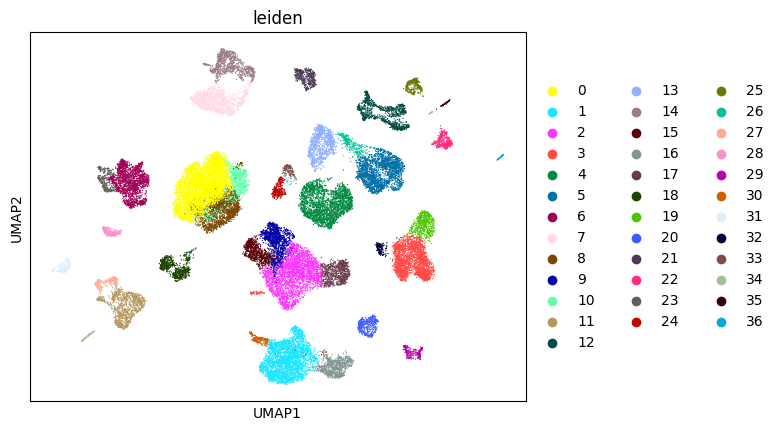

In [ ]:
# dimensionality reduction / clustering
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor="seurat_v3", layer="log1p")
adata_hvg = adata[:, adata.var["highly_variable"]].copy()

sc.pp.scale(adata_hvg, max_value=10)
sc.tl.pca(adata_hvg, svd_solver="arpack")
sc.pp.neighbors(adata_hvg, n_neighbors=15, n_pcs=50)
sc.tl.umap(adata_hvg)
sc.tl.leiden(adata_hvg, resolution=1, key_added="leiden")

# Transfer coordinates & clustering results back to original adata
adata.obsm["X_umap"] = adata_hvg.obsm["X_umap"]
adata.obsm["X_pca"] = adata_hvg.obsm["X_pca"]
adata.obs["leiden"] = adata_hvg.obs["leiden"].values

sc.pl.umap(adata, color=["leiden"])

In [ ]:
mg = mygene.MyGeneInfo()
genes = ["GABRQ", "ADRA1A", "FEZF2", "VAT1L"]

# Query human genes for corresponding Ensembl IDs
out = mg.querymany(genes, scopes="symbol", fields="ensembl.gene", species="human")

for r in out:
    symbol = r["query"]
    ensembl = r.get("ensembl", {})

    # Handle multiple Ensembl IDs
    if isinstance(ensembl, list):
        ids = [e.get("gene", "N/A") for e in ensembl]
        print(f"{symbol} -> {ids}")
    elif isinstance(ensembl, dict):
        print(f"{symbol} -> {ensembl.get('gene', 'Not found')}")
    else:
        print(f"{symbol} -> Not found")

INFO:biothings.client:querying 1-4 ...
INFO:biothings.client:Finished.


GABRQ -> ENSG00000268089
ADRA1A -> ENSG00000120907
FEZF2 -> ENSG00000153266
VAT1L -> ENSG00000171724


Target subpopulation: 0/35233 cells (0.00%)


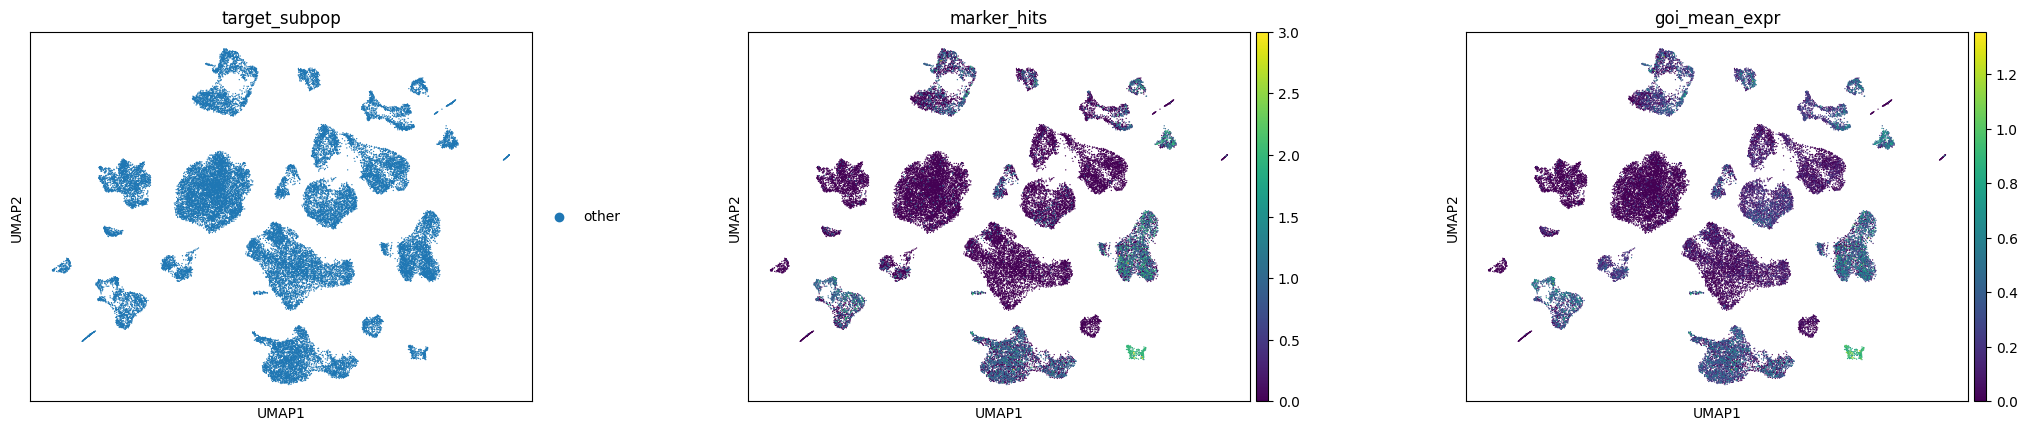

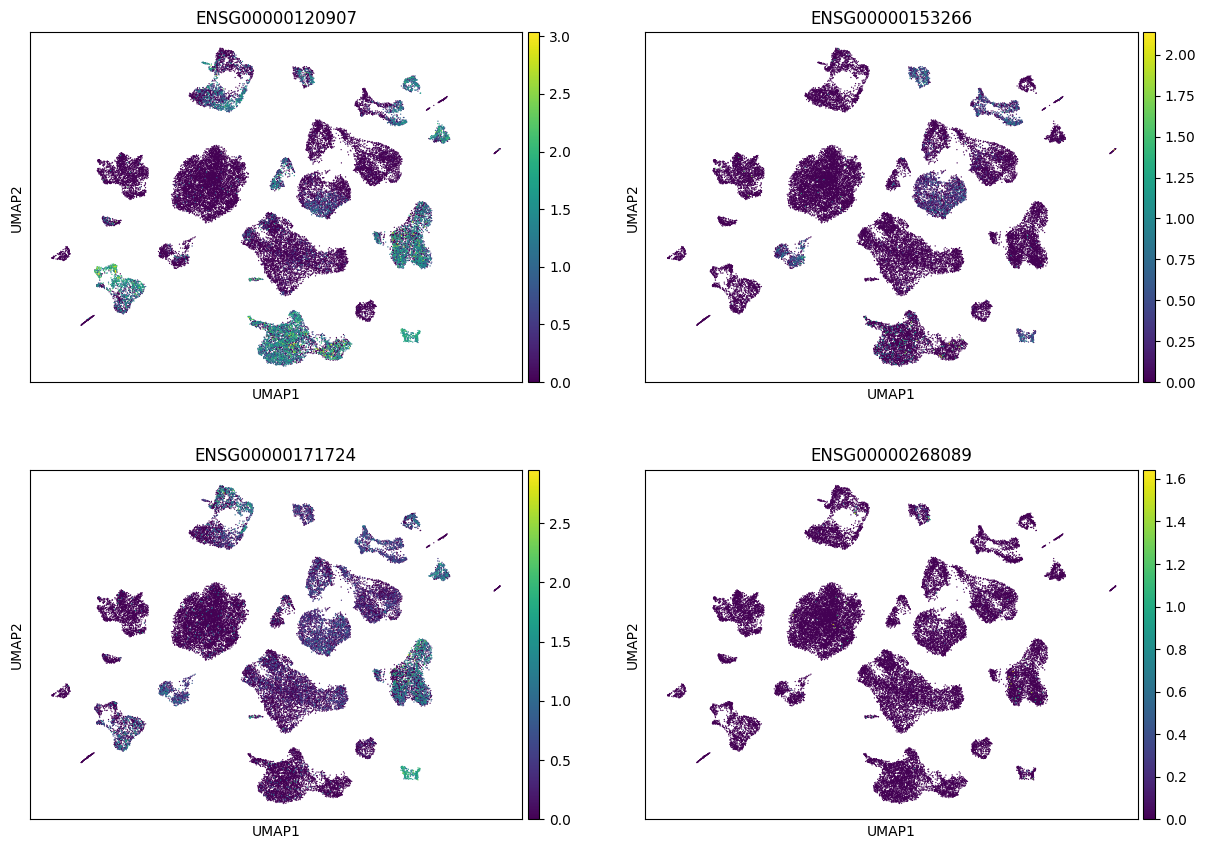

/tmp/ipython-input-1738806876.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("leiden")["_is_sub"]


n_sub  n_total  prop
leiden                      
0           0     4573   0.0
1           0     3033   0.0
2           0     2754   0.0
3           0     2390   0.0
4           0     2232   0.0
5           0     1970   0.0
6           0     1723   0.0
7           0     1417   0.0
8           0     1357   0.0
9           0     1117   0.0
10          0     1115   0.0
11          0     1061   0.0
12          0      995   0.0
13          0      967   0.0
14          0      913   0.0

In [ ]:
# Target genes' human Ensembl IDs
present_ids = ['ENSG00000120907', 'ENSG00000153266', 'ENSG00000171724', 'ENSG00000268089']
present_ids = [g for g in present_ids if g in adata.var_names]
assert len(present_ids) > 0, "Target genes not found in current adata.var_names"

# Expression
Xlog = adata.layers["log1p"] if "log1p" in adata.layers else adata.X
Xsub = Xlog[:, [np.where(adata.var_names == g)[0][0] for g in present_ids]]
Xsub = Xsub.toarray() if issparse(Xsub) else Xsub

min_expr = 1.0
min_genes_hit = 4
hits_per_cell = (Xsub >= min_expr).sum(axis=1)

adata.obs["marker_hits"] = hits_per_cell
adata.obs["goi_mean_expr"] = Xsub.mean(axis=1)
adata.obs["target_subpop"] = np.where(hits_per_cell >= min_genes_hit, "target", "other")

# Overall size and proportion
n_total = adata.n_obs
n_sub = int((adata.obs["target_subpop"] == "target").sum())
print(f"Target subpopulation: {n_sub}/{n_total} cells ({n_sub/n_total:.2%})")

# UMAP overlay with subpop / hit count / gene expression
sc.pl.umap(adata, color=["target_subpop","marker_hits","goi_mean_expr"], wspace=0.3)
sc.pl.umap(adata, color=present_ids, ncols=2)

# Distribution across clusters
if "leiden" in adata.obs.columns:
    by_clus = (
        adata.obs.assign(_is_sub = adata.obs["target_subpop"].values=="target")
        .groupby("leiden")["_is_sub"]
        .agg(["sum","count"])
        .rename(columns={"sum":"n_sub","count":"n_total"})
    )
    by_clus["prop"] = by_clus["n_sub"] / by_clus["n_total"]
    by_clus = by_clus.sort_values("prop", ascending=False)
    display(by_clus.head(15))
    by_clus.to_csv("/content/drive/MyDrive/Jobs/UCSF/subpopulation_by_cluster_4.csv")

In [ ]:
GABRQ_id = "ENSG00000268089"
X = adata.layers["log1p"] if "log1p" in adata.layers else adata.X
if issparse(X): X = X.toarray()
GABRQ_expr = X[:, np.where(adata.var_names == GABRQ_id)[0][0]]
print("GABRQ mean log1p:", np.mean(GABRQ_expr))
print("Cells >1.0 log1p:", np.mean(GABRQ_expr > 1.0))

GABRQ mean log1p: 0.0025461551
Cells >1.0 log1p: 0.0008514744699571425


In [ ]:
# Check all 4 genes
gene_dict = {
    "GABRQ": "ENSG00000268089",
    "ADRA1A": "ENSG00000120907",
    "FEZF2": "ENSG00000153266",
    "VAT1L": "ENSG00000171724"
}

print("=== Expression Summary ===")
for gene_name, gene_id in gene_dict.items():
    if gene_id in adata.var_names:
        idx = np.where(adata.var_names == gene_id)[0][0]
        expr = X[:, idx]
        mean_expr = np.mean(expr)
        pct_expr = np.mean(expr > 0) * 100
        pct_high = np.mean(expr > 1.0) * 100

        print(f"\n{gene_name} ({gene_id}):")
        print(f"  Mean log1p: {mean_expr:.4f}")
        print(f"  % cells expressing (>0): {pct_expr:.2f}%")
        print(f"  % cells high expr (>1.0): {pct_high:.2f}%")
    else:
        print(f"\n{gene_name}: NOT FOUND in data")

=== Expression Summary ===

GABRQ (ENSG00000268089):
  Mean log1p: 0.0025
  % cells expressing (>0): 0.46%
  % cells high expr (>1.0): 0.09%

ADRA1A (ENSG00000120907):
  Mean log1p: 0.2562
  % cells expressing (>0): 21.63%
  % cells high expr (>1.0): 13.33%

FEZF2 (ENSG00000153266):
  Mean log1p: 0.0334
  % cells expressing (>0): 6.37%
  % cells high expr (>1.0): 0.46%

VAT1L (ENSG00000171724):
  Mean log1p: 0.1510
  % cells expressing (>0): 20.68%
  % cells high expr (>1.0): 4.93%


Target subpopulation: 9/35233 cells (0.03%)


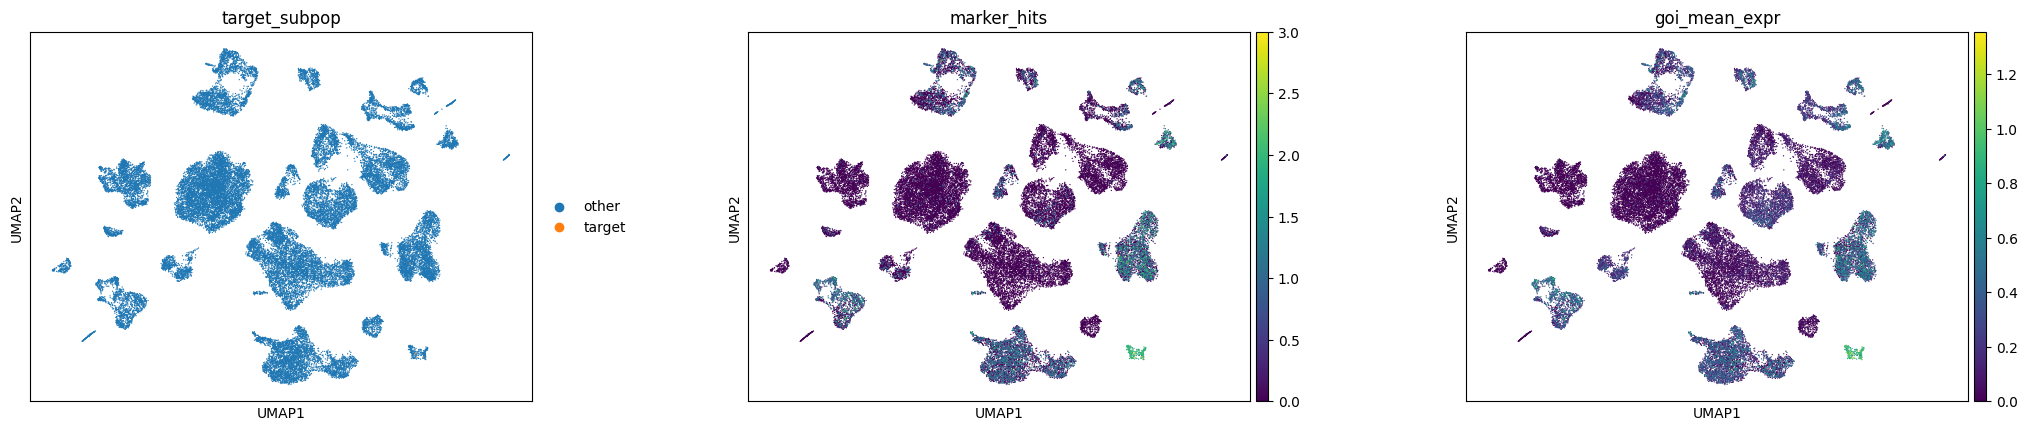

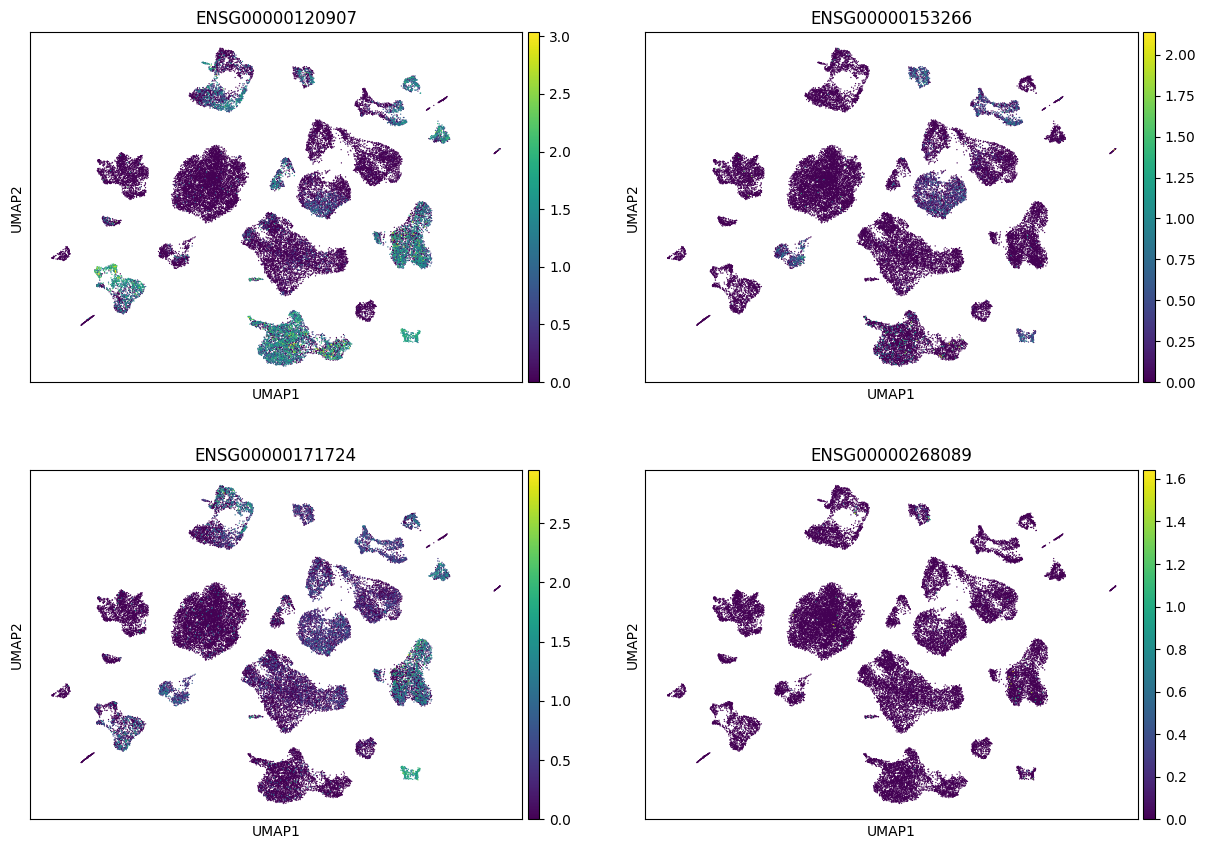

/tmp/ipython-input-1217036606.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("leiden")["_is_sub"]


n_sub  n_total      prop
leiden                          
29          5      225  0.022222
14          1      913  0.001095
3           2     2390  0.000837
1           1     3033  0.000330
0           0     4573  0.000000
4           0     2232  0.000000
2           0     2754  0.000000
7           0     1417  0.000000
5           0     1970  0.000000
9           0     1117  0.000000
10          0     1115  0.000000
11          0     1061  0.000000
6           0     1723  0.000000
12          0      995  0.000000
13          0      967  0.000000

In [ ]:
# min_expr/min_genes_hit -> 1/3

# Target genes' human Ensembl IDs
present_ids = ['ENSG00000120907', 'ENSG00000153266', 'ENSG00000171724', 'ENSG00000268089']
present_ids = [g for g in present_ids if g in adata.var_names]
assert len(present_ids) > 0, "Target genes not found in current adata.var_names"

# Expression
Xlog = adata.layers["log1p"] if "log1p" in adata.layers else adata.X
Xsub = Xlog[:, [np.where(adata.var_names == g)[0][0] for g in present_ids]]
Xsub = Xsub.toarray() if issparse(Xsub) else Xsub

min_expr = 1
min_genes_hit = 3
hits_per_cell = (Xsub >= min_expr).sum(axis=1)

adata.obs["marker_hits"] = hits_per_cell
adata.obs["goi_mean_expr"] = Xsub.mean(axis=1)
adata.obs["target_subpop"] = np.where(hits_per_cell >= min_genes_hit, "target", "other")

# Overall size and proportion
n_total = adata.n_obs
n_sub = int((adata.obs["target_subpop"] == "target").sum())
print(f"Target subpopulation: {n_sub}/{n_total} cells ({n_sub/n_total:.2%})")

# UMAP overlay with subpop / hit count / gene expression
sc.pl.umap(adata, color=["target_subpop","marker_hits","goi_mean_expr"], wspace=0.3)
sc.pl.umap(adata, color=present_ids, ncols=2)

# Distribution across clusters
if "leiden" in adata.obs.columns:
    by_clus = (
        adata.obs.assign(_is_sub = adata.obs["target_subpop"].values=="target")
        .groupby("leiden")["_is_sub"]
        .agg(["sum","count"])
        .rename(columns={"sum":"n_sub","count":"n_total"})
    )
    by_clus["prop"] = by_clus["n_sub"] / by_clus["n_total"]
    by_clus = by_clus.sort_values("prop", ascending=False)
    display(by_clus.head(15))
    #by_clus.to_csv("/content/drive/MyDrive/Jobs/UCSF/subpopulation_by_cluster_1_3.csv")

Sample sizes: Target=9, Other=35224

=== QC Characteristics Comparison ===
           Metric  Target_mean   Other_mean  Fold_change   Cohen_d  p_value  Significant Effect_size
n_genes_by_counts  5337.666667  4052.907506     1.316997  0.460501 0.287103        False       Small
     total_counts 22731.000000 13770.749972     1.650673  0.507557 0.411106        False      Medium
    pct_counts_mt     2.902536     1.383534     2.097915  0.494129 0.093244        False       Small
  pct_counts_ribo     0.394789     0.472655     0.835259 -0.268680 0.522234        False       Small


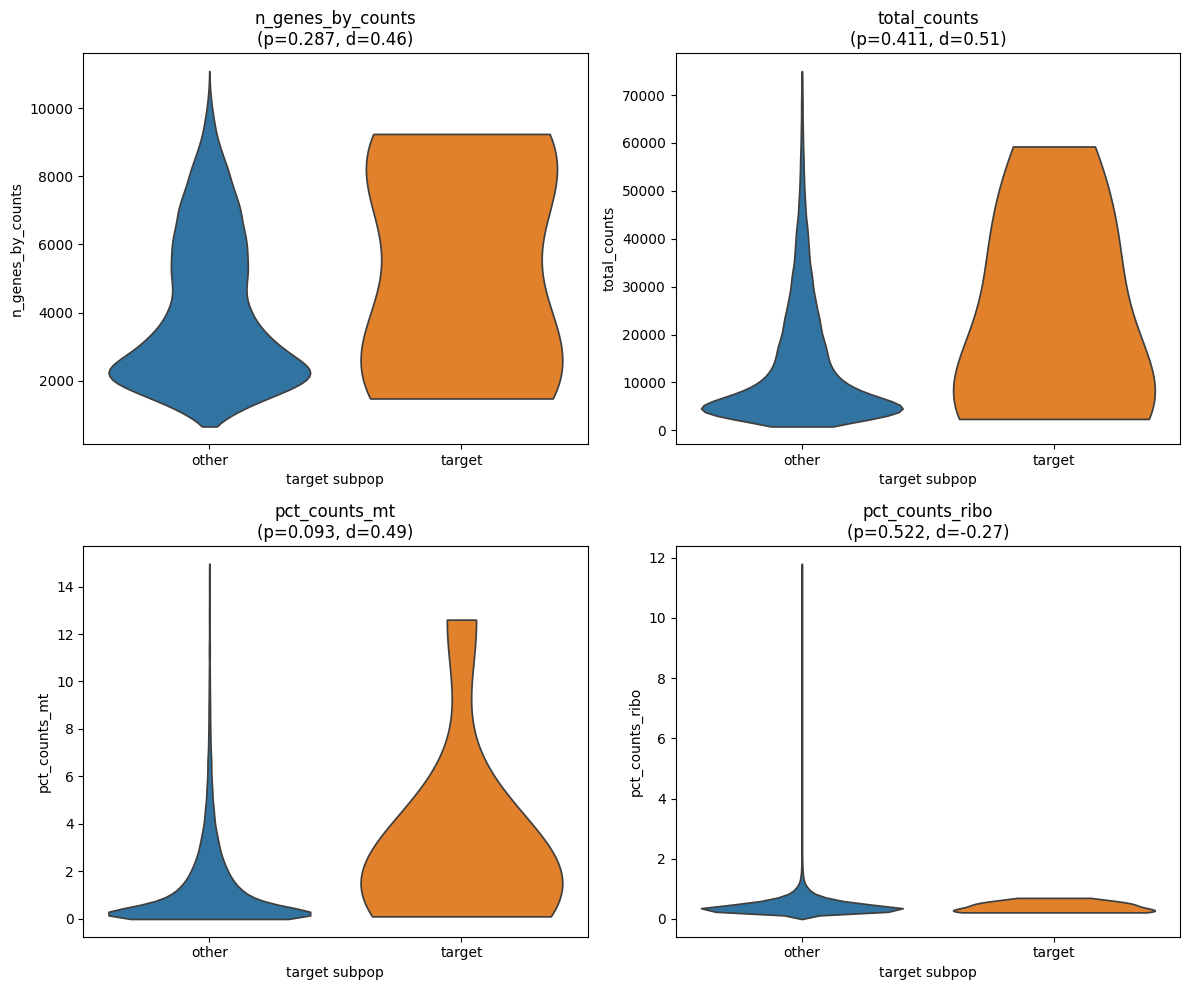

In [ ]:
target_mask = adata.obs["target_subpop"] == "target"
print(f"Sample sizes: Target={target_mask.sum()}, Other={(~target_mask).sum()}\n")

metrics = ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"]
rows = []

for m in metrics:
    if m in adata.obs.columns:
        a = adata.obs.loc[target_mask, m].astype(float)
        b = adata.obs.loc[~target_mask, m].astype(float)

        # Mann-Whitney U test
        stat, p = mannwhitneyu(a, b, alternative="two-sided")

        # Cohen's d
        pooled_std = np.sqrt(0.5 * (a.var(ddof=1) + b.var(ddof=1)))
        d = (a.mean() - b.mean()) / pooled_std

        # Fold change
        fc = a.mean() / b.mean() if b.mean() > 0 else np.nan

        rows.append([m, a.mean(), b.mean(), fc, d, p])

# Create summary table
summary = pd.DataFrame(rows, columns=["Metric", "Target_mean", "Other_mean", "Fold_change", "Cohen_d", "p_value"])
summary["Significant"] = summary["p_value"] < 0.05
summary["Effect_size"] = summary["Cohen_d"].apply(
    lambda x: "Large" if abs(x) > 0.8 else ("Medium" if abs(x) > 0.5 else "Small")
)

print("=== QC Characteristics Comparison ===")
print(summary.to_string(index=False))

# Better visualization
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, m in enumerate(metrics):
    if m in adata.obs.columns:
        sc.pl.violin(adata, keys=m, groupby="target_subpop",
                     ax=axes[i], show=False, stripplot=False)
        axes[i].set_title(f"{m}\n(p={summary.loc[i, 'p_value']:.3f}, d={summary.loc[i, 'Cohen_d']:.2f})")

plt.tight_layout()
plt.show()

Target subpopulation: 664/35233 cells (1.88%)


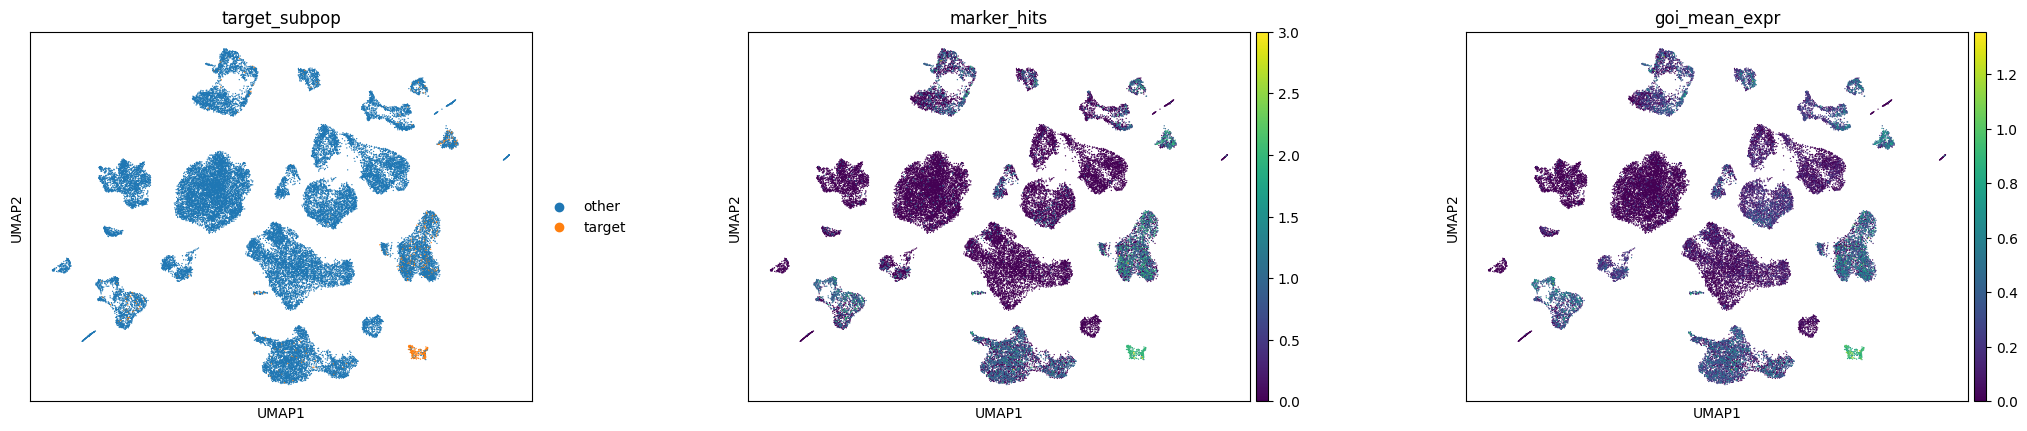

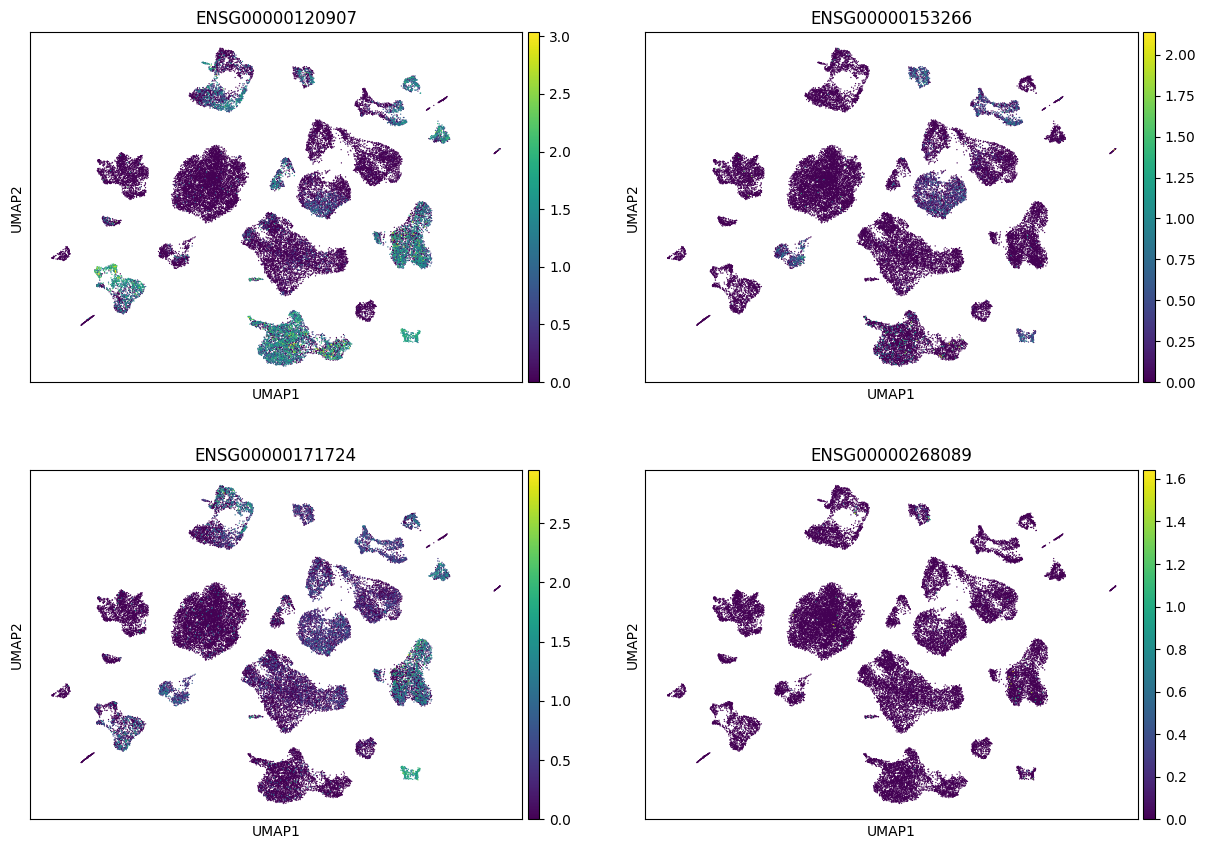

/tmp/ipython-input-958645290.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("leiden")["_is_sub"]


n_sub  n_total      prop
leiden                          
29        193      225  0.857778
22         52      380  0.136842
19         61      582  0.104811
3         181     2390  0.075732
25         16      283  0.056537
32          6      147  0.040816
11         43     1061  0.040528
27          7      251  0.027888
30          5      194  0.025773
21          8      414  0.019324
33          2      132  0.015152
1          44     3033  0.014507
14         12      913  0.013143
16          8      770  0.010390
7          14     1417  0.009880

In [ ]:
# min_expr/min_genes_hit -> 1/2

# Target genes' human Ensembl IDs
present_ids = ['ENSG00000120907', 'ENSG00000153266', 'ENSG00000171724', 'ENSG00000268089']
present_ids = [g for g in present_ids if g in adata.var_names]
assert len(present_ids) > 0, "Target genes not found in current adata.var_names"

# Expression
Xlog = adata.layers["log1p"] if "log1p" in adata.layers else adata.X
Xsub = Xlog[:, [np.where(adata.var_names == g)[0][0] for g in present_ids]]
Xsub = Xsub.toarray() if issparse(Xsub) else Xsub

min_expr = 1
min_genes_hit = 2
hits_per_cell = (Xsub >= min_expr).sum(axis=1)

adata.obs["marker_hits"] = hits_per_cell
adata.obs["goi_mean_expr"] = Xsub.mean(axis=1)
adata.obs["target_subpop"] = np.where(hits_per_cell >= min_genes_hit, "target", "other")

# Overall size and proportion
n_total = adata.n_obs
n_sub = int((adata.obs["target_subpop"] == "target").sum())
print(f"Target subpopulation: {n_sub}/{n_total} cells ({n_sub/n_total:.2%})")

# UMAP overlay with subpop / hit count / gene expression
sc.pl.umap(adata, color=["target_subpop","marker_hits","goi_mean_expr"], wspace=0.3)
sc.pl.umap(adata, color=present_ids, ncols=2)

# Distribution across clusters (count & proportion)
if "leiden" in adata.obs.columns:
    by_clus = (
        adata.obs.assign(_is_sub = adata.obs["target_subpop"].values=="target")
        .groupby("leiden")["_is_sub"]
        .agg(["sum","count"])
        .rename(columns={"sum":"n_sub","count":"n_total"})
    )
    by_clus["prop"] = by_clus["n_sub"] / by_clus["n_total"]
    by_clus = by_clus.sort_values("prop", ascending=False)
    display(by_clus.head(15))
    by_clus.to_csv("/content/drive/MyDrive/Jobs/UCSF/subpopulation_by_cluster_1_2.csv")

Sample sizes: Target=664, Other=34569

=== QC Characteristics Comparison ===
           Metric  Target_mean   Other_mean  Fold_change   Cohen_d      p_value  Significant Effect_size
n_genes_by_counts  4318.659639  4048.137435     1.066826  0.117967 2.007633e-02         True       Small
     total_counts 15905.036145 13732.087477     1.158239  0.152123 7.119390e-02        False       Small
    pct_counts_mt     1.130294     1.388794     0.813867 -0.138235 1.507242e-08         True       Small
  pct_counts_ribo     0.376141     0.474488     0.792730 -0.317784 6.984532e-25         True       Small


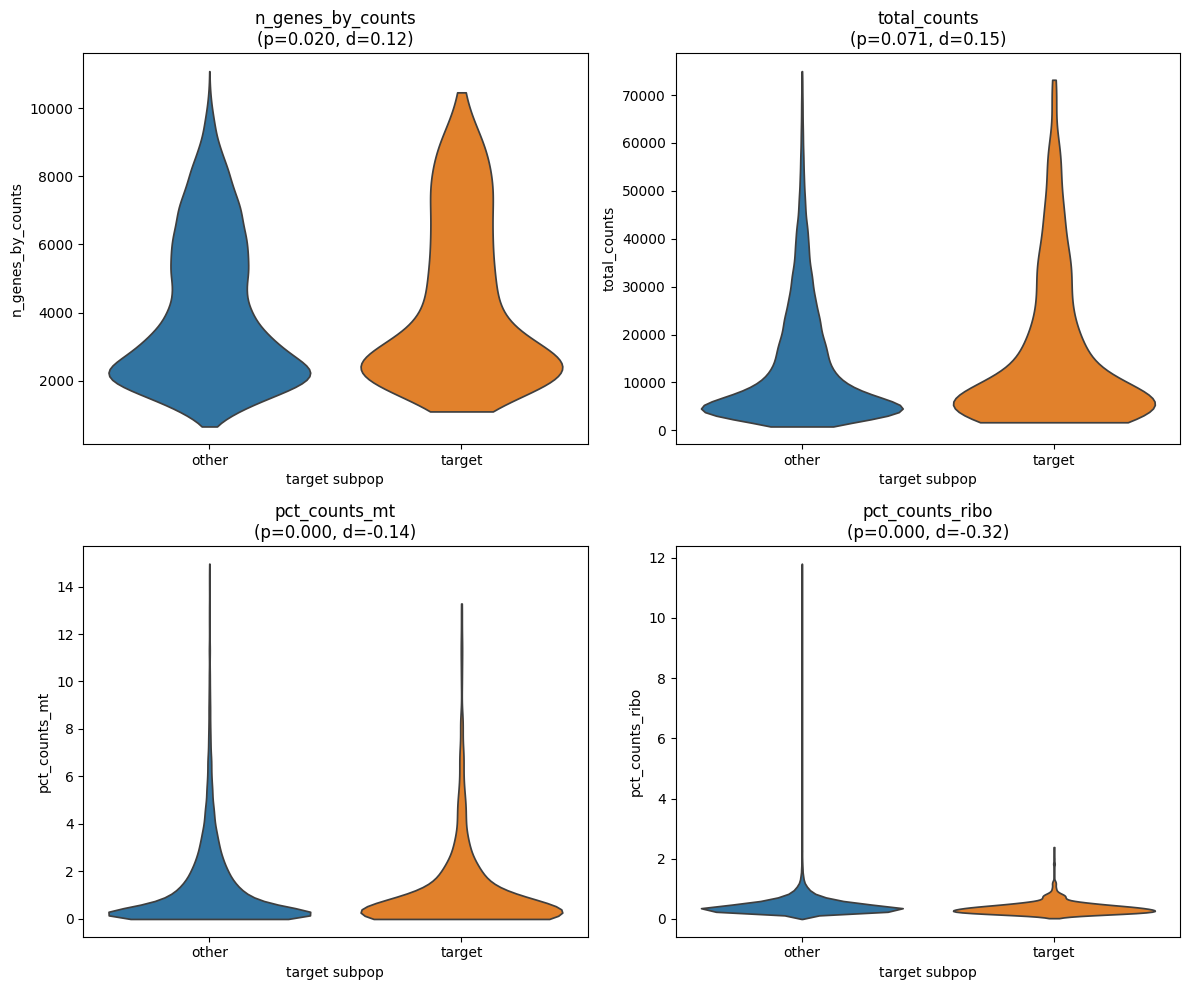

In [ ]:
target_mask = adata.obs["target_subpop"] == "target"
print(f"Sample sizes: Target={target_mask.sum()}, Other={(~target_mask).sum()}\n")

metrics = ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"]
rows = []

for m in metrics:
    if m in adata.obs.columns:
        a = adata.obs.loc[target_mask, m].astype(float)
        b = adata.obs.loc[~target_mask, m].astype(float)

        # Mann-Whitney U test
        stat, p = mannwhitneyu(a, b, alternative="two-sided")

        # Cohen's d
        pooled_std = np.sqrt(0.5 * (a.var(ddof=1) + b.var(ddof=1)))
        d = (a.mean() - b.mean()) / pooled_std

        # Fold change
        fc = a.mean() / b.mean() if b.mean() > 0 else np.nan

        rows.append([m, a.mean(), b.mean(), fc, d, p])

# Create summary table
summary = pd.DataFrame(rows, columns=["Metric", "Target_mean", "Other_mean", "Fold_change", "Cohen_d", "p_value"])
summary["Significant"] = summary["p_value"] < 0.05
summary["Effect_size"] = summary["Cohen_d"].apply(
    lambda x: "Large" if abs(x) > 0.8 else ("Medium" if abs(x) > 0.5 else "Small")
)

print("=== QC Characteristics Comparison ===")
print(summary.to_string(index=False))

# Better visualization
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, m in enumerate(metrics):
    if m in adata.obs.columns:
        sc.pl.violin(adata, keys=m, groupby="target_subpop",
                     ax=axes[i], show=False, stripplot=False)
        axes[i].set_title(f"{m}\n(p={summary.loc[i, 'p_value']:.3f}, d={summary.loc[i, 'Cohen_d']:.2f})")

plt.tight_layout()
plt.show()

Target subpopulation: 107/35233 cells (0.30%)


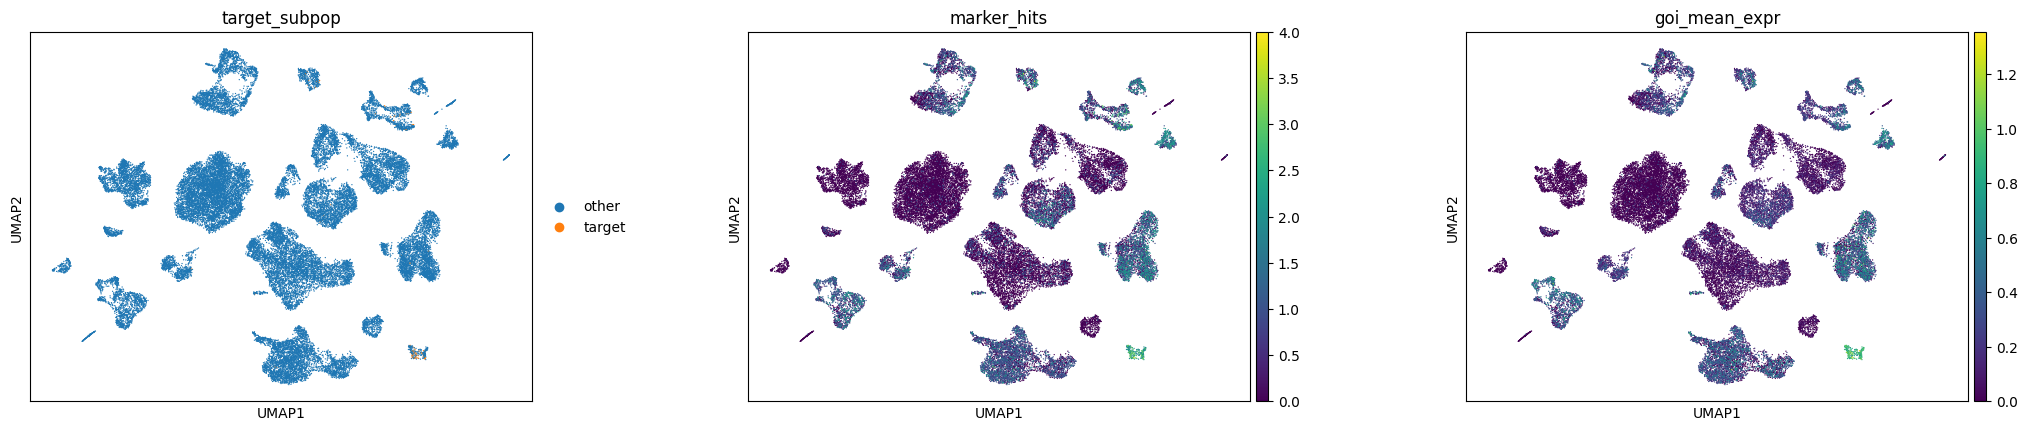

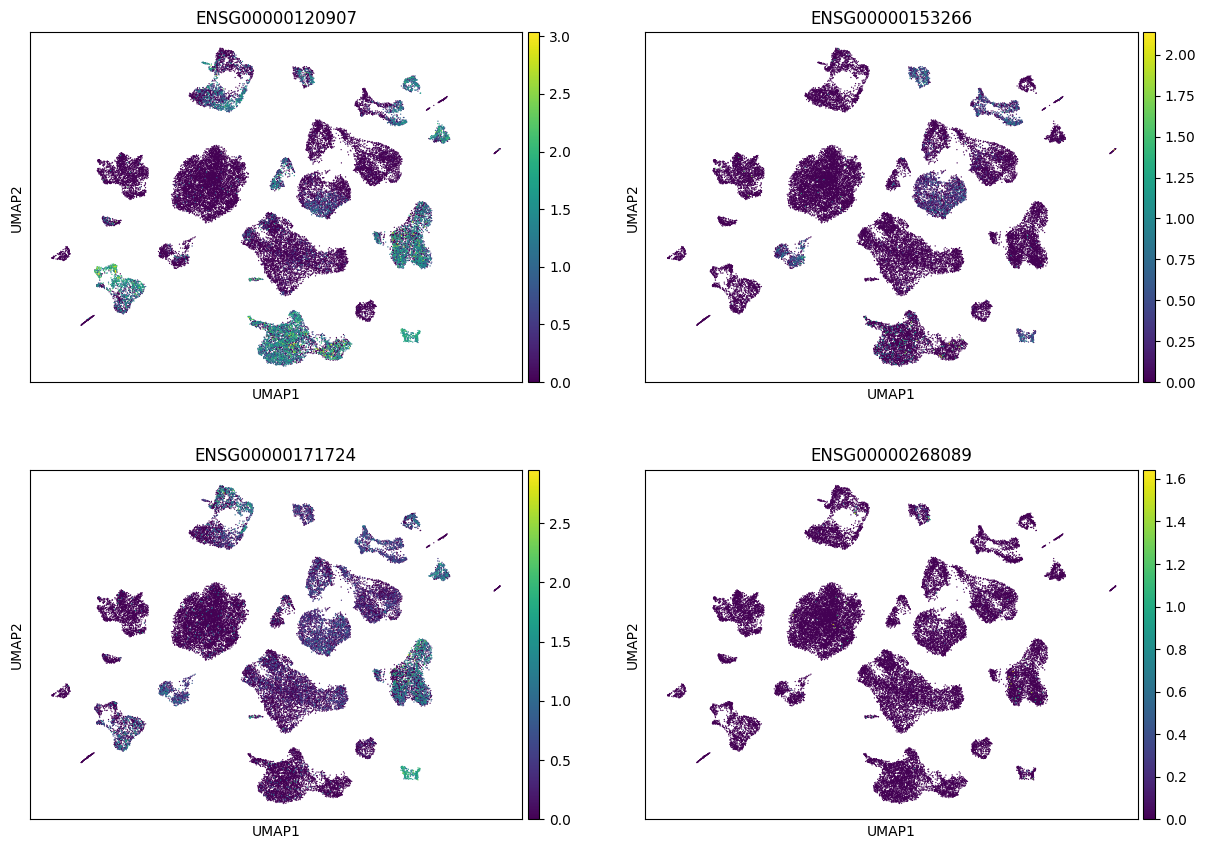

/tmp/ipython-input-2851952914.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("leiden")["_is_sub"]


n_sub  n_total      prop
leiden                          
29         51      225  0.226667
12         27      995  0.027136
21         10      414  0.024155
3           7     2390  0.002929
4           6     2232  0.002688
22          1      380  0.002632
18          1      672  0.001488
14          1      913  0.001095
1           3     3033  0.000989
2           0     2754  0.000000
0           0     4573  0.000000
8           0     1357  0.000000
5           0     1970  0.000000
11          0     1061  0.000000
10          0     1115  0.000000

In [ ]:
# min_expr/min_genes_hit -> 0.5/3

# Target genes' human Ensembl IDs
present_ids = ['ENSG00000120907', 'ENSG00000153266', 'ENSG00000171724', 'ENSG00000268089']
present_ids = [g for g in present_ids if g in adata.var_names]
assert len(present_ids) > 0, "Target genes not found in current adata.var_names"

# Expression
Xlog = adata.layers["log1p"] if "log1p" in adata.layers else adata.X
Xsub = Xlog[:, [np.where(adata.var_names == g)[0][0] for g in present_ids]]
Xsub = Xsub.toarray() if issparse(Xsub) else Xsub

min_expr = 0.5
min_genes_hit = 3
hits_per_cell = (Xsub >= min_expr).sum(axis=1)

adata.obs["marker_hits"] = hits_per_cell
adata.obs["goi_mean_expr"] = Xsub.mean(axis=1)
adata.obs["target_subpop"] = np.where(hits_per_cell >= min_genes_hit, "target", "other")

# Overall size and proportion
n_total = adata.n_obs
n_sub = int((adata.obs["target_subpop"] == "target").sum())
print(f"Target subpopulation: {n_sub}/{n_total} cells ({n_sub/n_total:.2%})")

# UMAP overlay with subpop / hit count / gene expression
sc.pl.umap(adata, color=["target_subpop","marker_hits","goi_mean_expr"], wspace=0.3)
sc.pl.umap(adata, color=present_ids, ncols=2)

# Distribution across clusters
if "leiden" in adata.obs.columns:
    by_clus = (
        adata.obs.assign(_is_sub = adata.obs["target_subpop"].values=="target")
        .groupby("leiden")["_is_sub"]
        .agg(["sum","count"])
        .rename(columns={"sum":"n_sub","count":"n_total"})
    )
    by_clus["prop"] = by_clus["n_sub"] / by_clus["n_total"]
    by_clus = by_clus.sort_values("prop", ascending=False)
    display(by_clus.head(15))
    by_clus.to_csv("/content/drive/MyDrive/Jobs/UCSF/subpopulation_by_cluster_0.5_3.csv")

Sample sizes: Target=107, Other=35126

=== QC Characteristics Comparison ===
           Metric  Target_mean   Other_mean  Fold_change   Cohen_d      p_value  Significant Effect_size
n_genes_by_counts  6465.700935  4045.886893     1.598092  1.175989 6.009533e-26         True       Large
     total_counts 27038.579439 13732.629619     1.968929  0.984053 4.344208e-24         True       Large
    pct_counts_mt     2.759000     1.379733     1.999662  0.604104 5.200450e-12         True      Medium
  pct_counts_ribo     0.380193     0.472917     0.803932 -0.317803 1.515569e-03         True       Small


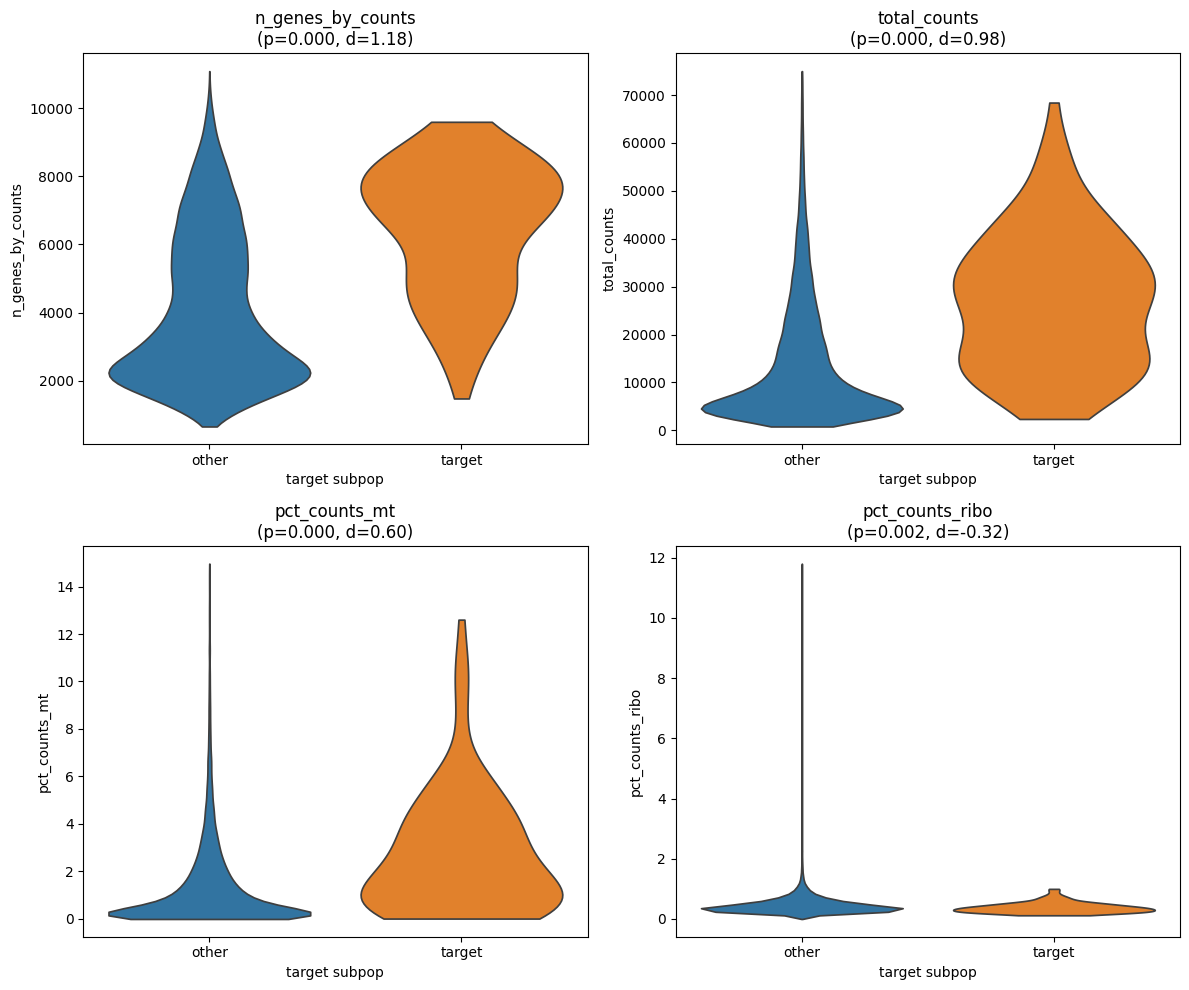

In [ ]:
target_mask = adata.obs["target_subpop"] == "target"
print(f"Sample sizes: Target={target_mask.sum()}, Other={(~target_mask).sum()}\n")

metrics = ["n_genes_by_counts", "total_counts", "pct_counts_mt", "pct_counts_ribo"]
rows = []

for m in metrics:
    if m in adata.obs.columns:
        a = adata.obs.loc[target_mask, m].astype(float)
        b = adata.obs.loc[~target_mask, m].astype(float)

        # Mann-Whitney U test
        stat, p = mannwhitneyu(a, b, alternative="two-sided")

        # Cohen's d
        pooled_std = np.sqrt(0.5 * (a.var(ddof=1) + b.var(ddof=1)))
        d = (a.mean() - b.mean()) / pooled_std

        # Fold change
        fc = a.mean() / b.mean() if b.mean() > 0 else np.nan

        rows.append([m, a.mean(), b.mean(), fc, d, p])

# Create summary table
summary = pd.DataFrame(rows, columns=["Metric", "Target_mean", "Other_mean", "Fold_change", "Cohen_d", "p_value"])
summary["Significant"] = summary["p_value"] < 0.05
summary["Effect_size"] = summary["Cohen_d"].apply(
    lambda x: "Large" if abs(x) > 0.8 else ("Medium" if abs(x) > 0.5 else "Small")
)

print("=== QC Characteristics Comparison ===")
print(summary.to_string(index=False))

# Better visualization
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, m in enumerate(metrics):
    if m in adata.obs.columns:
        sc.pl.violin(adata, keys=m, groupby="target_subpop",
                     ax=axes[i], show=False, stripplot=False)
        axes[i].set_title(f"{m}\n(p={summary.loc[i, 'p_value']:.3f}, d={summary.loc[i, 'Cohen_d']:.2f})")

plt.tight_layout()
plt.show()

In [ ]:
# Target subpopulation distribution across clusters
by_clus = (
    adata.obs.assign(_is_sub = adata.obs["target_subpop"] == "target")
    .groupby("leiden")["_is_sub"].agg(["sum", "count"])
    .rename(columns={"sum": "n_target", "count": "n_total"})
)
by_clus["prop_target"] = by_clus["n_target"] / by_clus["n_total"]
by_clus = by_clus.sort_values("prop_target", ascending=False)

print("=== Target Subpopulation Distribution ===")
print(by_clus.head(15))
by_clus.to_csv("/content/drive/MyDrive/Jobs/UCSF/target_by_cluster.csv")

/tmp/ipython-input-93149220.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("leiden")["_is_sub"].agg(["sum", "count"])


=== Target Subpopulation Distribution ===
        n_target  n_total  prop_target
leiden                                
29            51      225     0.226667
12            27      995     0.027136
21            10      414     0.024155
3              7     2390     0.002929
4              6     2232     0.002688
22             1      380     0.002632
18             1      672     0.001488
14             1      913     0.001095
1              3     3033     0.000989
2              0     2754     0.000000
0              0     4573     0.000000
8              0     1357     0.000000
5              0     1970     0.000000
11             0     1061     0.000000
10             0     1115     0.000000


In [ ]:
from scipy.stats import fisher_exact

n_target_total = (adata.obs["target_subpop"] == "target").sum()
n_other_total = (adata.obs["target_subpop"] == "other").sum()

enrichment_results = []
for cluster in adata.obs["leiden"].unique():
    cluster_mask = adata.obs["leiden"] == cluster
    target_mask = adata.obs["target_subpop"] == "target"

    # Contingency table
    a = (cluster_mask & target_mask).sum()
    b = (cluster_mask & ~target_mask).sum()
    c = (~cluster_mask & target_mask).sum()
    d = (~cluster_mask & ~target_mask).sum()

    odds_ratio, pval = fisher_exact([[a, b], [c, d]])

    enrichment_results.append({
        "cluster": cluster,
        "n_target": a,
        "n_total": a + b,
        "proportion": a / (a + b) if (a + b) > 0 else 0,
        "odds_ratio": odds_ratio,
        "p_value": pval,
        "enriched": pval < 0.05 and odds_ratio > 1
    })

enrich_df = pd.DataFrame(enrichment_results).sort_values("odds_ratio", ascending=False)
enrich_df = enrich_df.reset_index(drop=True)

print("\n=== Cluster Enrichment Analysis ===")
print(enrich_df[enrich_df["enriched"]].head(10))
enrich_df.to_csv("/content/drive/MyDrive/Jobs/UCSF/cluster_enrichment.csv", index=False)


=== Cluster Enrichment Analysis ===
  cluster  n_target  n_total  proportion  odds_ratio       p_value  enriched
0      29        51      225    0.226667  182.938424  2.194628e-84      True
1      12        27      995    0.027136   11.909427  1.936583e-18      True
2      21        10      414    0.024155    8.860365  5.742651e-07      True


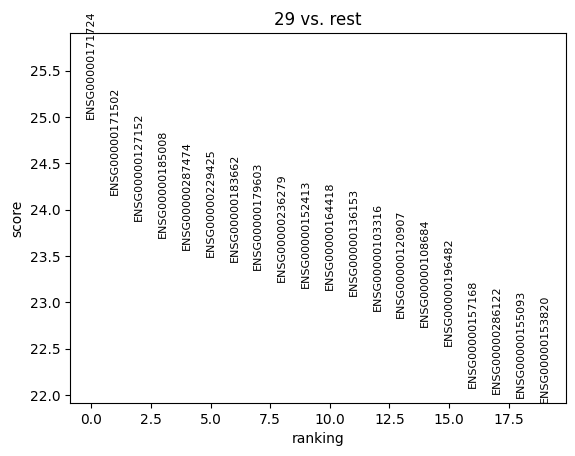

In [ ]:
# Check Cluster 29
sc.tl.rank_genes_groups(adata, groupby="leiden", groups=["29"], method="wilcoxon")
sc.pl.rank_genes_groups(adata, groups=["29"], n_genes=20)

In [ ]:
# Target cells' relationship with clusters
# Compare target cells vs each cluster's centroid
from scipy.spatial.distance import cosine

pc = adata.obsm["X_pca"]
target_mask = adata.obs["target_subpop"] == "target"

# Target subpopulation centroid
target_centroid = pc[target_mask].mean(axis=0)

# Cluster centroids
df_pc = pd.DataFrame(pc, index=adata.obs_names)
df_pc["leiden"] = adata.obs["leiden"].values
cluster_centroids = df_pc.groupby("leiden").mean()

# Calculate correlation between target and each cluster
correlations = []
for cluster_id in cluster_centroids.index:
    cluster_vec = cluster_centroids.loc[cluster_id].values
    corr = np.corrcoef(target_centroid, cluster_vec)[0, 1]
    cos_sim = 1 - cosine(target_centroid, cluster_vec)
    correlations.append({
        "cluster": str(cluster_id),
        "pearson_corr": corr,
        "cosine_similarity": cos_sim
    })

corr_df = pd.DataFrame(correlations).sort_values("pearson_corr", ascending=False)
corr_df = corr_df.reset_index(drop=True)

print("\n=== Target Subpopulation Correlation with Clusters ===")
print(corr_df.head(15))
corr_df.to_csv("/content/drive/MyDrive/Jobs/UCSF/target_cluster_correlation.csv", index=False)

/tmp/ipython-input-2092431553.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cluster_centroids = df_pc.groupby("leiden").mean()



=== Target Subpopulation Correlation with Clusters ===
   cluster  pearson_corr  cosine_similarity
0       29      0.879958           0.884230
1       12      0.766003           0.751001
2        4      0.706674           0.699933
3       18      0.688903           0.679367
4        2      0.662316           0.672756
5        5      0.613963           0.617212
6       17      0.613404           0.599934
7       26      0.577262           0.565977
8       21      0.571661           0.581177
9       13      0.546069           0.530898
10      15      0.536115           0.548952
11       9      0.521314           0.533763
12      20      0.438605           0.470068
13      14      0.357231           0.394527
14      25      0.315621           0.301881


/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


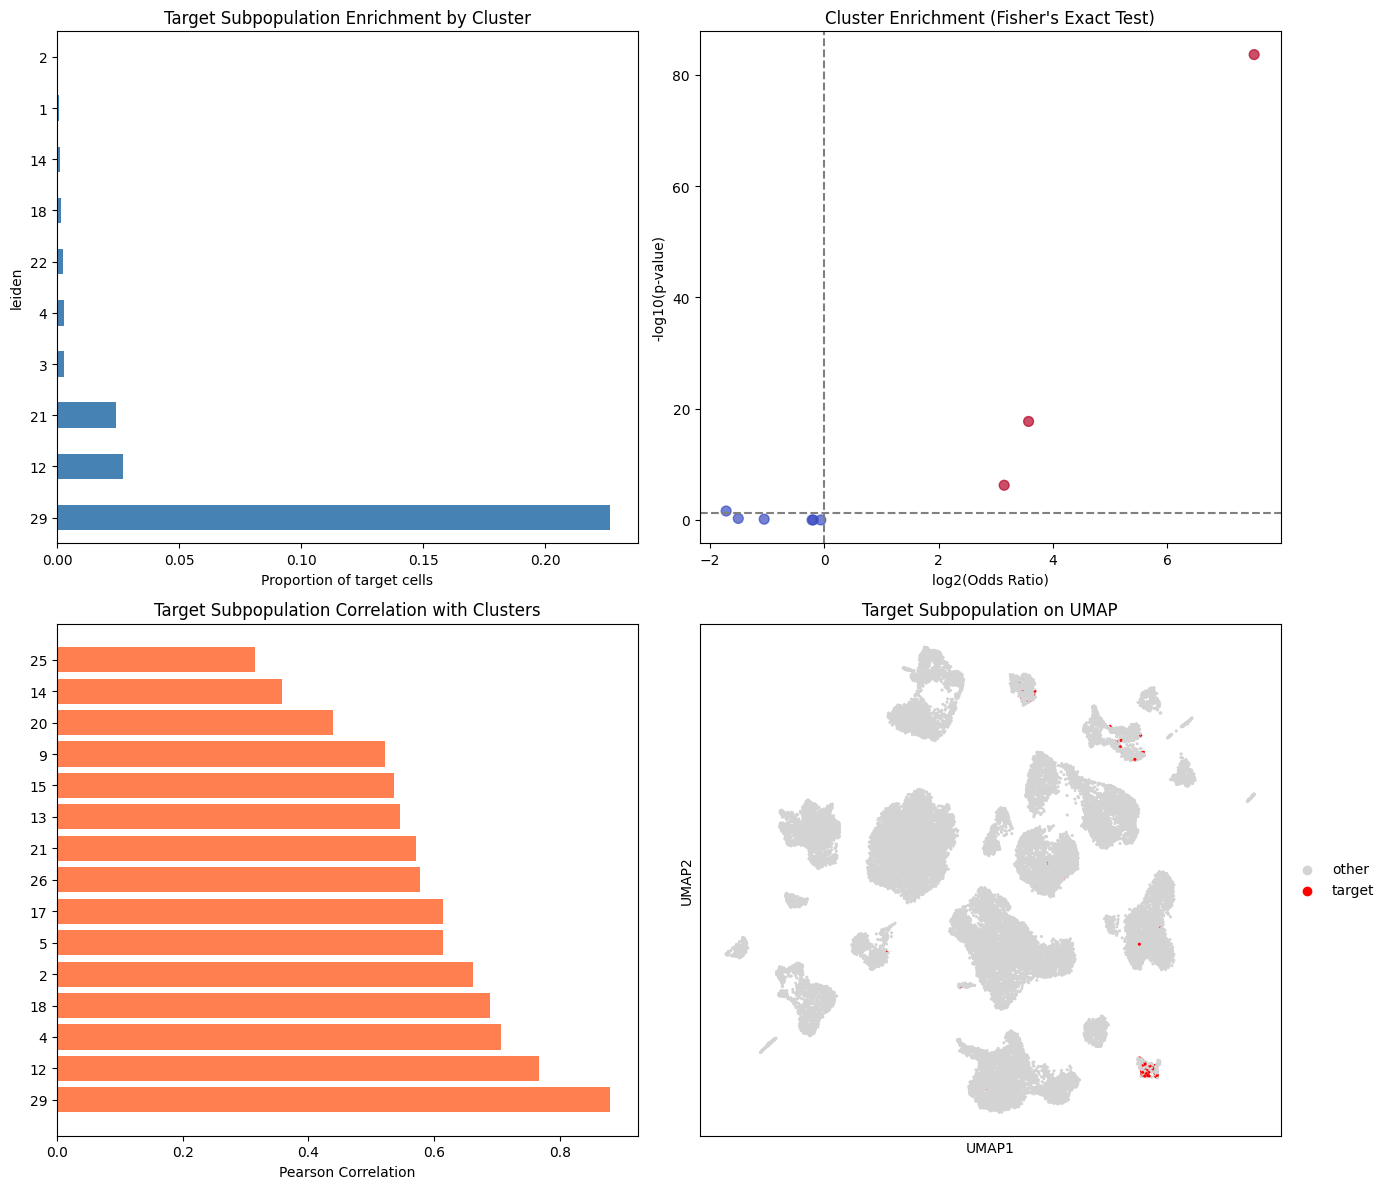

In [ ]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Distribution bar plot
ax = axes[0, 0]
top_clusters = by_clus.head(10).index
by_clus.loc[top_clusters, "prop_target"].plot(kind="barh", ax=ax, color="steelblue")
ax.set_xlabel("Proportion of target cells")
ax.set_title("Target Subpopulation Enrichment by Cluster")

# Enrichment volcano plot
ax = axes[0, 1]
enrich_df["-log10_p"] = -np.log10(enrich_df["p_value"] + 1e-300)
ax.scatter(np.log2(enrich_df["odds_ratio"]), enrich_df["-log10_p"],
           c=enrich_df["enriched"], cmap="coolwarm", s=50, alpha=0.7)
ax.axhline(-np.log10(0.05), ls="--", c="gray")
ax.axvline(0, ls="--", c="gray")
ax.set_xlabel("log2(Odds Ratio)")
ax.set_ylabel("-log10(p-value)")
ax.set_title("Cluster Enrichment (Fisher's Exact Test)")

# Correlation heatmap (target vs clusters)
ax = axes[1, 0]
top_corr = corr_df.head(15)
y_pos = np.arange(len(top_corr))
ax.barh(y_pos, top_corr["pearson_corr"].values, color="coral")
ax.set_yticks(y_pos)
ax.set_yticklabels(top_corr["cluster"].values)
ax.set_xlabel("Pearson Correlation")
ax.set_title("Target Subpopulation Correlation with Clusters")

# UMAP with target cells highlighted
ax = axes[1, 1]
sc.pl.umap(adata, color="target_subpop", ax=ax, show=False,
           palette={"target": "red", "other": "lightgray"}, size=20)
ax.set_title("Target Subpopulation on UMAP")

plt.tight_layout()
plt.show()

In [ ]:
# Summary
print("="*60)
print("SUMMARY: Target Subpopulation Characteristics")
print("="*60)
print(f"Total cells: {n_target_total} ({n_target_total/adata.n_obs:.2%})")
print(f"\nTop enriched clusters:")
for idx, row in enrich_df[enrich_df["enriched"]].head(5).iterrows():
    print(f"  Cluster {row['cluster']}: {row['proportion']:.1%} ({row['n_target']}/{row['n_total']} cells), OR={row['odds_ratio']:.2f}, p={row['p_value']:.2e}")
print(f"\nMost correlated clusters (PCA space):")
for idx, row in corr_df.head(5).iterrows():
    print(f"  Cluster {row['cluster']}: r={row['pearson_corr']:.3f}")

SUMMARY: Target Subpopulation Characteristics
Total cells: 107 (0.30%)

Top enriched clusters:
  Cluster 29: 22.7% (51/225 cells), OR=182.94, p=2.19e-84
  Cluster 12: 2.7% (27/995 cells), OR=11.91, p=1.94e-18
  Cluster 21: 2.4% (10/414 cells), OR=8.86, p=5.74e-07

Most correlated clusters (PCA space):
  Cluster 29: r=0.880
  Cluster 12: r=0.766
  Cluster 4: r=0.707
  Cluster 18: r=0.689
  Cluster 2: r=0.662


In [ ]:
adata.write_h5ad("/content/drive/MyDrive/Jobs/UCSF/adata_final_after_QC_and_clustering.h5ad", compression="gzip")

In [ ]:
adata = sc.read_h5ad("/content/drive/MyDrive/Jobs/UCSF/adata_final_after_QC_and_clustering.h5ad")

# Check must have cols
must_have_obs = ["Sample_ID", "target_subpop"]
print(set(must_have_obs).issubset(adata.obs.columns), adata.obs.columns.tolist()[:10])

# Raw counts
has_counts = "counts" in adata.layers
print("Has counts layer:", has_counts)
if not has_counts:
    raise ValueError("No `adata.layers['counts']` found. You need raw counts for pseudobulk.")

True ['orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Barcode', 'Sample_ID', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo']
Has counts layer: True


In [ ]:
# Pseudobulk Analysis: Target Subpopulation vs Others
# Get raw counts
counts = adata.layers['counts'] if 'counts' in adata.layers else adata.raw.X
if issparse(counts):
    counts = counts.toarray()

# Define groups
adata.obs["subpopulation"] = adata.obs["target_subpop"].copy()
target_mask = adata.obs['subpopulation'] == 'target'
other_mask = ~target_mask

print(f"Target subpopulation: {target_mask.sum()} cells")
print(f"Reference (other): {other_mask.sum()} cells")

Target subpopulation: 107 cells
Reference (other): 35126 cells


In [ ]:
print("Checking gene annotation:")
print(f"adata.var columns: {adata.var.columns.tolist()}")

# Check symbol
if 'symbol' in adata.var.columns:
    print(f"\nFirst 10 'symbol' values:")
    print(adata.var['symbol'].head(10))

    # Check symbol vs Ensembl ID
    is_ensembl = adata.var['symbol'].str.match(r'^ENSG\d+')
    print(f"\nGenes with Ensembl IDs as symbols: {is_ensembl.sum()} / {adata.n_vars}")
    print(f"Genes with real symbols: {(~is_ensembl).sum()} / {adata.n_vars}")
else:
    print("No 'symbol' column found!")

Checking gene annotation:
adata.var columns: ['symbol', 'chrom', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm']

First 10 'symbol' values:
ENSG00000243485        MIR1302-2HG
ENSG00000238009    ENSG00000238009
ENSG00000239945    ENSG00000239945
ENSG00000239906    ENSG00000239906
ENSG00000241860    ENSG00000241860
ENSG00000241599    ENSG00000241599
ENSG00000286448    ENSG00000286448
ENSG00000235146    ENSG00000235146
ENSG00000229905    ENSG00000229905
ENSG00000237491          LINC01409
Name: symbol, dtype: category
Categories (31316, object): ['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', ..., 'ZYG11B', 'ZYX', 'ZZEF1', 'ZZZ3']

Genes with Ensembl IDs as symbols: 7207 / 31327
Genes with real symbols: 24120 / 31327


In [ ]:
# Aggregate to pseudobulk (sum across cells)
pseudobulk_target = counts[target_mask].sum(axis=0)
pseudobulk_other = counts[other_mask].sum(axis=0)

# Normalize to CPM (Counts Per Million)
cpm_target = (pseudobulk_target / pseudobulk_target.sum()) * 1e6
cpm_other = (pseudobulk_other / pseudobulk_other.sum()) * 1e6

# Calculate fold changes
# Add pseudocount to avoid division by zero
log2fc = np.log2((cpm_target + 1) / (cpm_other + 1))

# Calculate expression percentage in each group
pct_target = (counts[target_mask] > 0).sum(axis=0) / target_mask.sum() * 100
pct_other = (counts[other_mask] > 0).sum(axis=0) / other_mask.sum() * 100

# Create results table
results = pd.DataFrame({
    'gene_id': adata.var_names,
    'gene_symbol': adata.var['symbol'] if 'symbol' in adata.var else adata.var_names,
    'pseudobulk_target': pseudobulk_target,
    'pseudobulk_other': pseudobulk_other,
    'cpm_target': cpm_target,
    'cpm_other': cpm_other,
    'log2_fold_change': log2fc,
    'pct_expressed_target': pct_target,
    'pct_expressed_other': pct_other
})

# Upregulated genes
# Criteria:
# 1. log2FC > 1 (at least 2-fold upregulation)
# 2. Expressed in >10% of target cells
# 3. CPM in target > 10 (not just noise)

upregulated = results[
    (results['log2_fold_change'] > 1) &
    (results['pct_expressed_target'] > 10) &
    (results['cpm_target'] > 10)
].sort_values('log2_fold_change', ascending=False)

print(f"\n{'='*60}")
print(f"Enriched genes (upregulated) in target subpopulation")
print(f"{'='*60}")
print(f"Total upregulated genes (log2FC > 1): {len(upregulated)}")
print(f"\nTop 30 upregulated genes:")
print(upregulated[['gene_symbol', 'log2_fold_change', 'cpm_target', 'cpm_other',
                   'pct_expressed_target', 'pct_expressed_other']].head(30).to_string(index=False))

# Save results
upregulated.to_csv("/content/pseudobulk_upregulated_genes.csv", index=False)
results.to_csv("/content/pseudobulk_all_genes.csv", index=False)


Enriched genes (upregulated) in target subpopulation
Total upregulated genes (log2FC > 1): 291

Top 30 upregulated genes:
    gene_symbol  log2_fold_change  cpm_target  cpm_other  pct_expressed_target  pct_expressed_other
ENSG00000260951          4.658116  120.976662   3.831079             29.906542             1.104595
      LINC02964          4.433172  128.580917   4.998231             41.121495             3.214143
      LINC00922          4.095557   50.118904   1.990171             21.495327             1.087514
      LINC02424          3.855968   71.894707   4.034242             38.317757             2.772875
          FEZF2          3.761530  103.348633   6.694023             94.392523             6.106588
          GABRQ          3.685825   16.591084   0.366938             14.953271             0.415647
ENSG00000285778          3.595984   51.501495   3.341828             35.514019             1.930194
ENSG00000285817          3.402574   41.823360   3.049522             24.29906

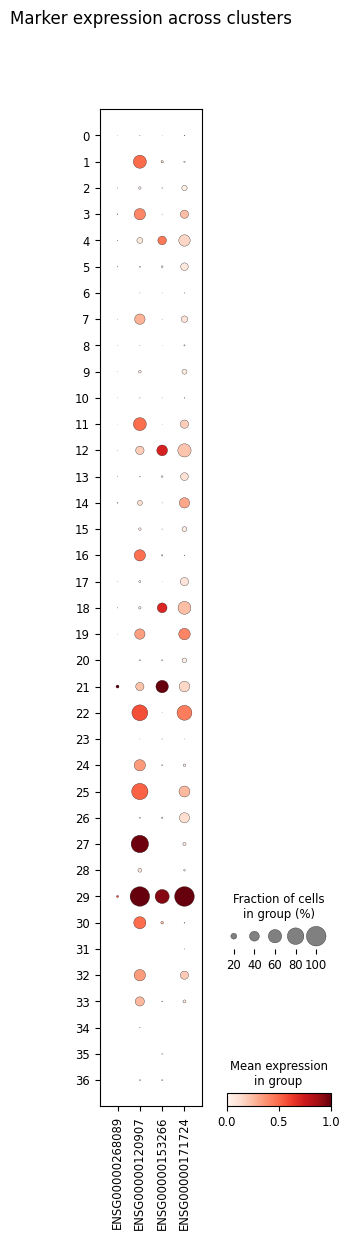

In [ ]:
sc.pl.dotplot(
    adata,
    var_names=[
        "ENSG00000268089",  # GABRQ
        "ENSG00000120907",  # ADRA1A
        "ENSG00000153266",  # FEZF2
        "ENSG00000171724"   # VAT1L
    ],
    groupby="leiden",
    standard_scale="var",
    title="Marker expression across clusters"
)

In [ ]:
!pip install adjustText

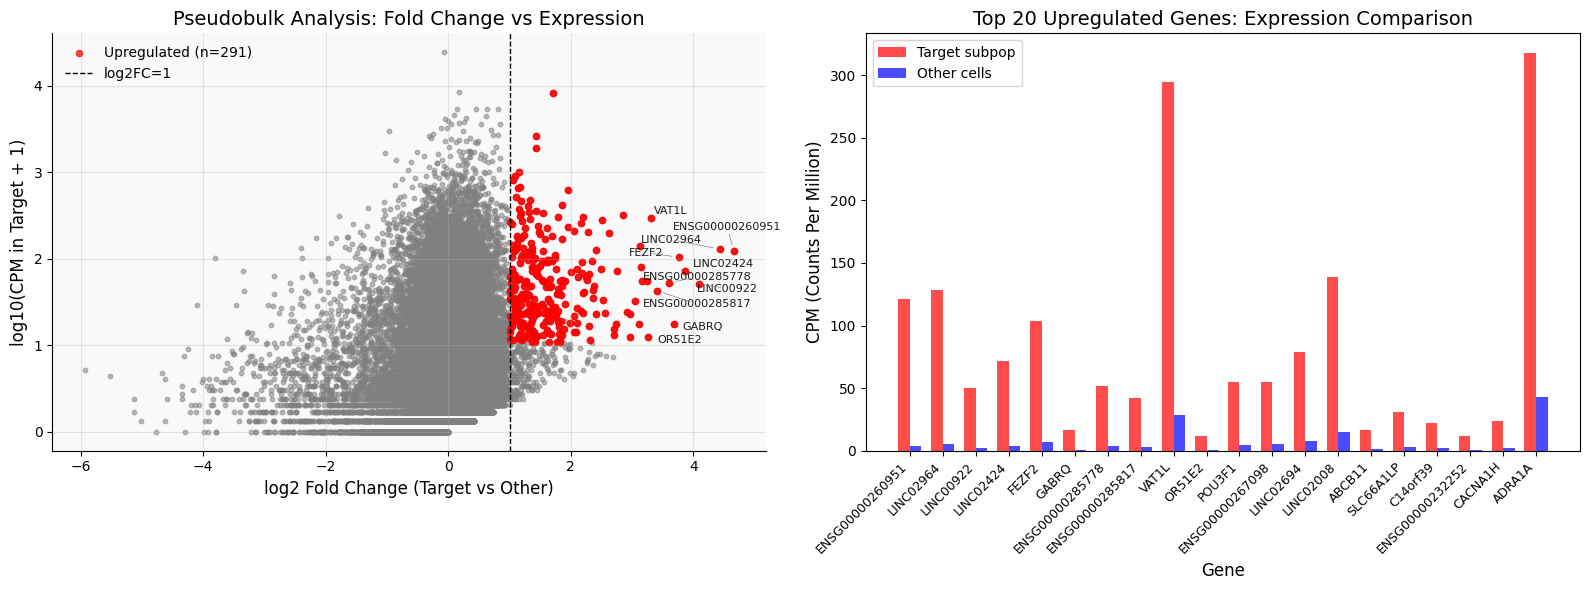

In [ ]:
#  Visualization
# Volcano-like plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# A: FC vs Expression level
ax = axes[0]
ax.scatter(results['log2_fold_change'],
           np.log10(results['cpm_target'] + 1),
           c='gray', alpha=0.3, s=10, label='_nolegend_')
ax.scatter(upregulated['log2_fold_change'],
           np.log10(upregulated['cpm_target'] + 1),
           c='red', alpha=0.7, s=20, label=f'Upregulated (n={len(upregulated)})')

# Annotate top genes
ax = axes[0]
ax.scatter(results['log2_fold_change'],
           np.log10(results['cpm_target'] + 1),
           c='gray', alpha=0.3, s=10)
ax.scatter(upregulated['log2_fold_change'],
           np.log10(upregulated['cpm_target'] + 1),
           c='red', alpha=0.7, s=20, label=f'Upregulated (n={len(upregulated)})')

top10 = upregulated.head(10)
texts = []
for _, row in top10.iterrows():
    texts.append(
        ax.text(row['log2_fold_change'],
                np.log10(row['cpm_target'] + 1),
                row['gene_symbol'], fontsize=8, alpha=0.9)
    )


adjust_text(texts,
            ax=ax,
            arrowprops=dict(arrowstyle='-', color='gray', lw=0.5, shrinkA=5, shrinkB=5),
            only_move={'points': 'y', 'texts': 'xy'},
            force_points=0.2, force_text=0.5)


ax.axvline(1, ls='--', c='black', lw=1, label='log2FC=1')
ax.set_xlabel('log2 Fold Change (Target vs Other)', fontsize=12)
ax.set_ylabel('log10(CPM in Target + 1)', fontsize=12)
ax.set_title('Pseudobulk Analysis: Fold Change vs Expression', fontsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
ax.grid(alpha=0.3)
ax.set_facecolor('#f9f9f9')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), frameon=False, loc='upper left')

# B: Expression comparison
ax = axes[1]
top20 = upregulated.head(20)
x = np.arange(len(top20))
width = 0.35

ax.bar(x - width/2, top20['cpm_target'], width, label='Target subpop', color='red', alpha=0.7)
ax.bar(x + width/2, top20['cpm_other'], width, label='Other cells', color='blue', alpha=0.7)

ax.set_xlabel('Gene', fontsize=12)
ax.set_ylabel('CPM (Counts Per Million)', fontsize=12)
ax.set_title('Top 20 Upregulated Genes: Expression Comparison', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(top20['gene_symbol'], rotation=45, ha='right', fontsize=9)
ax.legend()


plt.tight_layout()
#plt.savefig("/content/pseudobulk_analysis.pdf", dpi=300)
plt.show()


Genes: 50


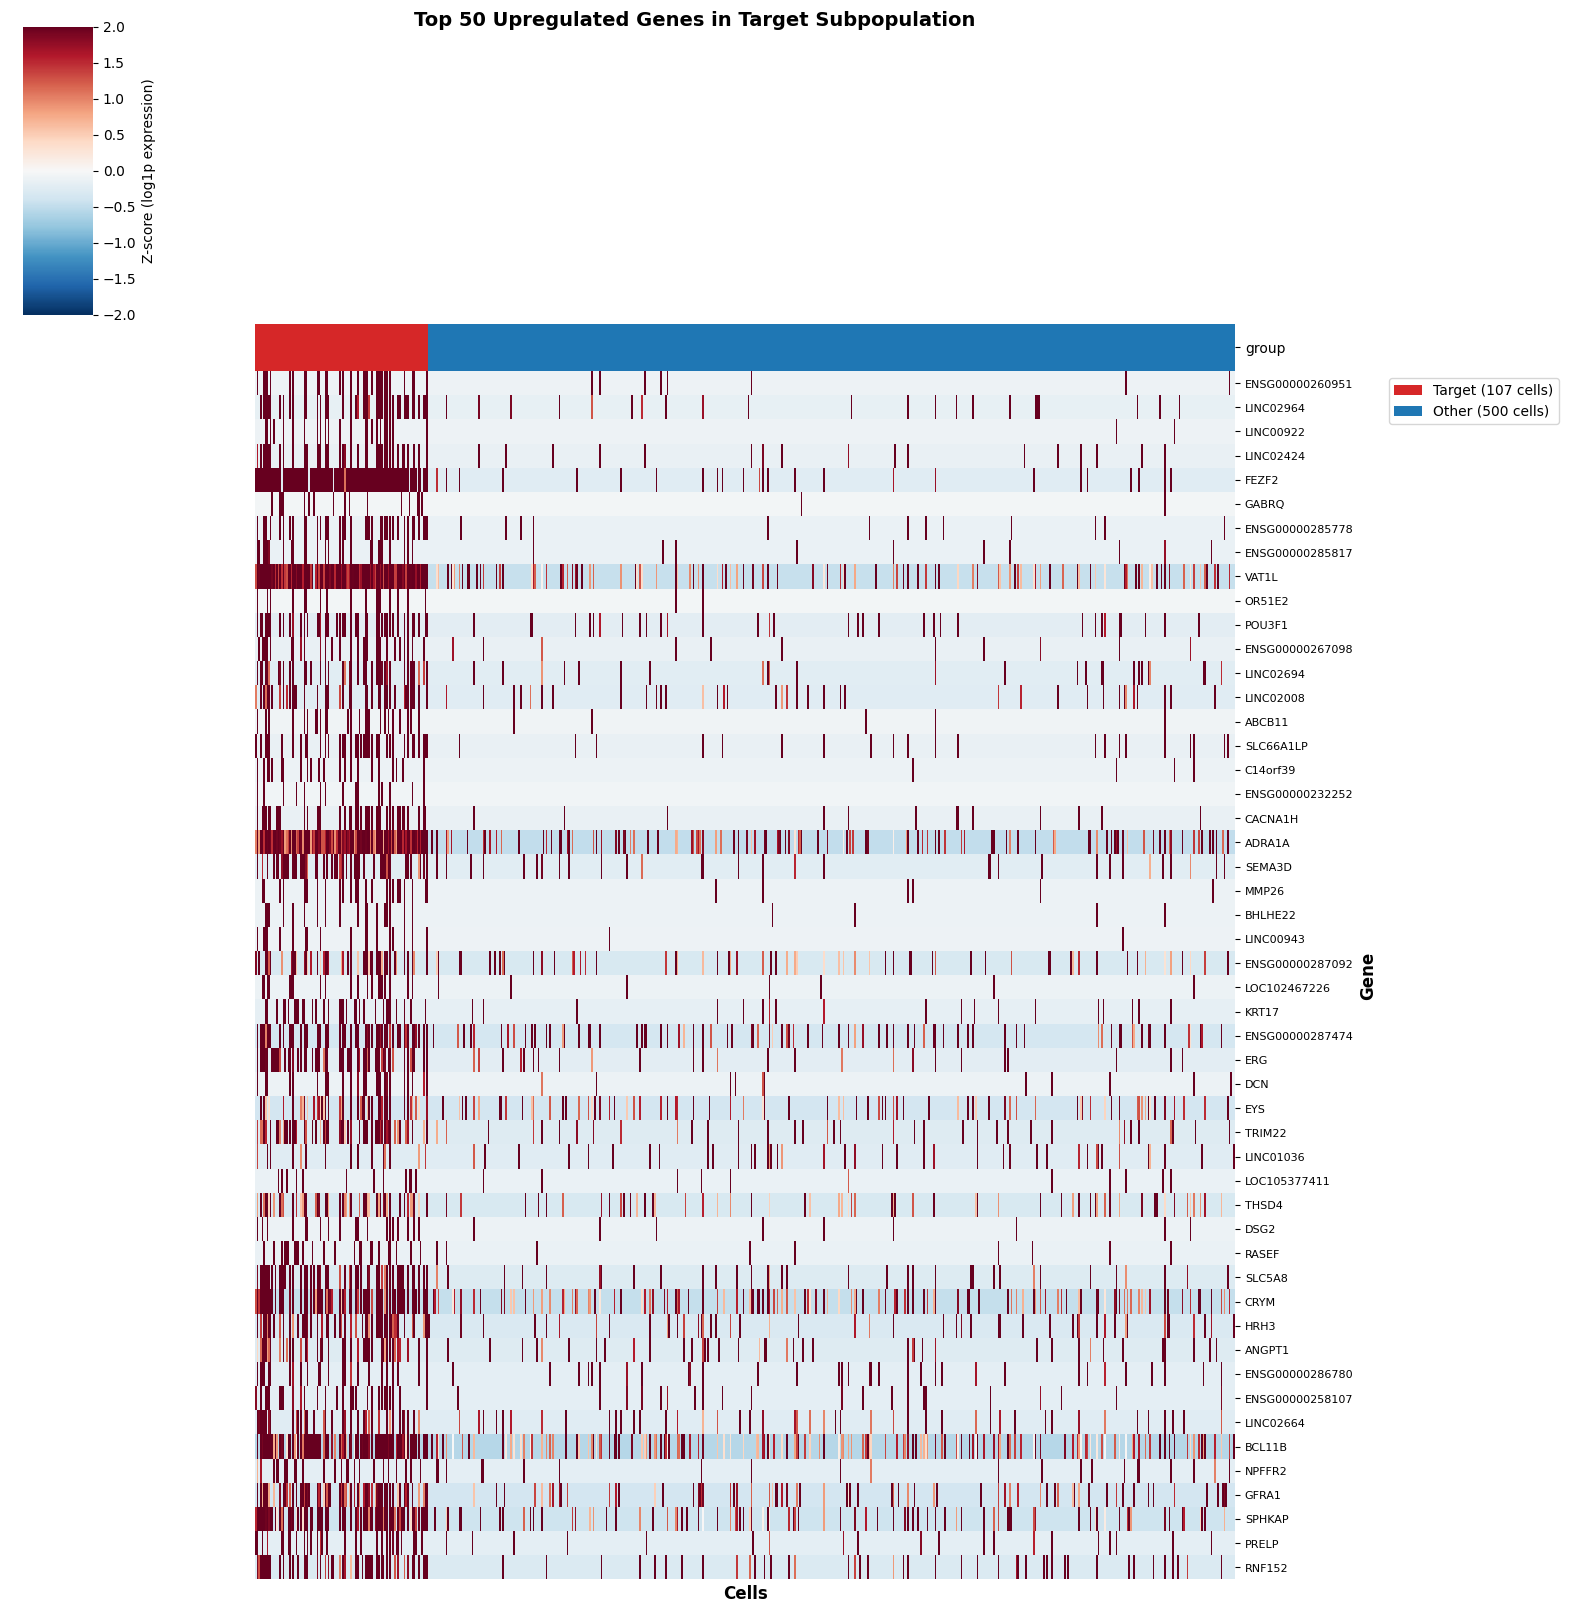

In [ ]:
# C. Heatmap
# Extract top 50 genes
genes_available = [g for g in upregulated.head(50)['gene_id'] if g in adata.raw.var_names]
gene_symbols = [upregulated[upregulated['gene_id']==g]['gene_symbol'].values[0] for g in genes_available]

print(f"Genes: {len(genes_available)}")

# Get expression matrix
gene_indices = [list(adata.raw.var_names).index(g) for g in genes_available]
X = adata.raw.X[:, gene_indices]
if issparse(X):
    X = X.toarray()

# Z-score normalization
X_log = np.log1p(X)
X_scaled = zscore(X_log, axis=0)
X_scaled = np.nan_to_num(X_scaled, nan=0)
X_scaled = np.clip(X_scaled, -3, 3)

df = pd.DataFrame(X_scaled, index=adata.obs_names, columns=gene_symbols)
df['group'] = adata.obs['subpopulation'].values
df = df.sort_values('group', ascending=False)
group_col = df['group']
df = df.drop('group', axis=1)

# Downsample other cells for visualization
if len(df) > 600:
    target_mask = group_col == 'target'
    target_cells = df[target_mask]
    other_cells = df[~target_mask].sample(n=500, random_state=42)
    df = pd.concat([target_cells, other_cells])
    group_col = group_col[df.index]

colors = {'target': '#d62728', 'other': '#1f77b4'}
row_colors = group_col.map(colors)

g = sns.clustermap(
    df.T,
    col_colors=row_colors,
    col_cluster=False,
    row_cluster=False,
    cmap='RdBu_r',
    center=0,
    vmin=-2, vmax=2,
    figsize=(14, 16),
    yticklabels=True,
    xticklabels=False,
    cbar_kws={'label': 'Z-score (log1p expression)', 'shrink': 0.5},
    linewidths=0
)

g.ax_heatmap.set_xlabel('Cells', fontsize=12, fontweight='bold')
g.ax_heatmap.set_ylabel('Gene', fontsize=12, fontweight='bold')
g.ax_heatmap.tick_params(axis='y', labelsize=8)

plt.suptitle('Top 50 Upregulated Genes in Target Subpopulation',
             fontsize=14, fontweight='bold', y=0.99)

from matplotlib.patches import Patch
n_target = (group_col == 'target').sum()
n_other = (group_col == 'other').sum()
legend = [
    Patch(facecolor='#d62728', label=f'Target ({n_target} cells)'),
    Patch(facecolor='#1f77b4', label=f'Other ({n_other} cells)')
]
g.ax_heatmap.legend(handles=legend, bbox_to_anchor=(1.15, 1),
                    loc='upper left', frameon=True, fontsize=10)

plt.show()
plt.savefig('/content/drive/MyDrive/Jobs/heatmap_top50_symbols.pdf', dpi=300, bbox_inches='tight')
plt.close()
